In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import MDAnalysis.analysis.encore 
import matplotlib
import itertools
import matplotlib.pyplot as plt
matplotlib.use('Agg')

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\PC\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\PC\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\PC\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\PC\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\PC\Anaconda3\

In [2]:
#D372P
u1 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372P\md_nvt.pdb',
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372P\md_nvt_100ps.dcd')

u2 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372PH376P\md_nvt.pdb',
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372PH376P\md_nvt_100ps.dcd')


C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


# RMSD of Trajectories D372P and D372P_H376P in the reference of their first frame respectively

In [3]:
ref1=mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372P\md_nvt.pdb',
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372P\md_nvt_100ps.dcd')
#bb = u1.select_atoms('backbone')
R = mda.analysis.rms.RMSD(u1, ref1, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)',
                                           '(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)'])            #cluster: h376, d287, d372, e126b, he3
R.run()

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [4]:
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
#ax.plot(time, rmsd[4], 'r--', label="D372")
#ax.plot(time, rmsd[5], 'b--', label="D287")
#ax.plot(time, rmsd[6], 'y--', label="E126B")
#ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.plot(time, rmsd[8], 'c--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_d372p.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [5]:
ref2=mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372PH376P\md_nvt.pdb',
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\H376D372\DPDRO3_D372PH376P\md_nvt_100ps.dcd')
R2 = mda.analysis.rms.RMSD(u2, ref2, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)',
                                           '(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)'])            
R2.run()

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [6]:
rmsd = R2.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
#ax.plot(time, rmsd[4], 'r--', label="D372")
#ax.plot(time, rmsd[5], 'b--', label="D287")
#ax.plot(time, rmsd[6], 'y--', label="E126B")
#ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.plot(time, rmsd[8], 'c--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_d372ph376p.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

# RMSD for Btype_MD trajectories, with PRA protonated/deprotonated 

In [3]:
u4 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_25ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_50ns_100.dcd')

u5 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\2_pddro3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\2_pddro3\md_nvt_12ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\2_pddro3\md_nvt_25ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\2_pddro3\md_nvt_50ns_100.dcd')

u6 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\3_ppdro3_f3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\3_ppdro3_f3\md_nvt_12ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\3_ppdro3_f3\md_nvt_25ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\3_ppdro3_f3\md_nvt_37ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\3_ppdro3_f3\md_nvt_50ns_100.dcd')

u7 = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\4_dpdro3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\4_dpdro3\md_nvt_25ns_100.dcd')
                

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [8]:
ref4=mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_25ns_100.dcd',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\1_dddro3\md_nvt_50ns_100.dcd')
R4 = mda.analysis.rms.RMSD(u4, ref4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)',
                                           '(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)'])            
R4.run()

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [9]:
rmsd = R4.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
ax.plot(time, rmsd[4], 'r--', label="D372")
#ax.plot(time, rmsd[5], 'b--', label="D287")
#ax.plot(time, rmsd[6], 'y--', label="E126B")
#ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.plot(time, rmsd[8], 'c--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_p1.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [10]:
R5 = mda.analysis.rms.RMSD(u5, u5, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
R5.run()

In [11]:
rmsd = R5.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
#ax.plot(time, rmsd[4], 'r--', label="D372")
ax.plot(time, rmsd[5], 'b--', label="D287")
#ax.plot(time, rmsd[6], 'y--', label="E126B")
#ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_p2.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [12]:
R6 = mda.analysis.rms.RMSD(u6, u6, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
R6.run()

In [13]:
rmsd = R6.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
#ax.plot(time, rmsd[4], 'r--', label="D372")
#ax.plot(time, rmsd[5], 'b--', label="D287")
#ax.plot(time, rmsd[6], 'y--', label="E126B")
#ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_p3.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [14]:
R7 = mda.analysis.rms.RMSD(u7, u7, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
R7.run()

In [15]:
rmsd = R7.rmsd.T   # transpose makes it easier for plotting
time = rmsd[0]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'm--', label="H376")
#ax.plot(time, rmsd[4], 'r--', label="D372")
ax.plot(time, rmsd[5], 'b--', label="D287")
ax.plot(time, rmsd[6], 'y--', label="E126B")
ax.plot(time, rmsd[7], 'g--', label="HE3")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\rmsd_p4.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

 
# RMSD of Trajectories in the reference of P1‘s first frame

In [4]:
r1 = mda.analysis.rms.RMSD(u1, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r1.run()

r2 = mda.analysis.rms.RMSD(u2, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r2.run()

r4 = mda.analysis.rms.RMSD(u4, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r4.run()

r5 = mda.analysis.rms.RMSD(u5, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r5.run()

r6 = mda.analysis.rms.RMSD(u6, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r6.run()

r7 = mda.analysis.rms.RMSD(u7, u4, 
                           select = 'backbone',
                           groupselections=['backbone and (resid 370 and resname HIS and segid A)',
                                           'backbone and (resid 366 and resname ASP and segid A)',
                                           'backbone and (resid 281 and resname ASP and segid A)',
                                           'backbone and (resid 124 and segid B and resname GLU)',
                                           '(resid 1 and segid A and resname HEM and not type H)'])            
r7.run()


In [17]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[2],'-',  label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\tot_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [18]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[3], '--', label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\h376_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [19]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[4], '--', label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\d372_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [20]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[5], '--', label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\d287_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [21]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[6], '--', label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\e126b_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

In [22]:
datalist=[r1, r2, r4, r5, r6, r7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(datalist):
    rmsd=x.rmsd.T
    time=rmsd[0]
    ax.plot(time, rmsd[7],'--',  label=datalabel[i])
    
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
#fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\rmsd\he3_rmsd_comp.pdf')

Text(0,0.5,'RMSD ($\\AA$)')

# Do clustering for MD trajectories

In [4]:
#cluster_collection1_1 = MDAnalysis.analysis.encore.cluster(u1)
#cluster for only (D287, D372, H376, E126B and He3)
cluster_collection1_2 = MDAnalysis.analysis.encore.cluster(u1, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

#cluster_collection2_1 = MDAnalysis.analysis.encore.cluster(u2)
cluster_collection2_2 = MDAnalysis.analysis.encore.cluster(u2, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

#cluster_collection4_1 = MDAnalysis.analysis.encore.cluster(u4)
cluster_collection4_2 = MDAnalysis.analysis.encore.cluster(u4, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

#cluster_collection5_1 = MDAnalysis.analysis.encore.cluster(u5)
cluster_collection5_2 = MDAnalysis.analysis.encore.cluster(u5, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

#cluster_collection6_1 = MDAnalysis.analysis.encore.cluster(u6)
cluster_collection6_2 = MDAnalysis.analysis.encore.cluster(u6, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

#cluster_collection7_1 = MDAnalysis.analysis.encore.cluster(u7)
cluster_collection7_2 = MDAnalysis.analysis.encore.cluster(u7, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [9]:
#save clusters data in file
universes=[u1, u2, u4, u5, u6, u7]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']
dataset1=[cluster_collection1_1, cluster_collection2_1, cluster_collection4_1, \
          cluster_collection5_1, cluster_collection6_1, cluster_collection7_1]
dataset2=[cluster_collection1_2, cluster_collection2_2, cluster_collection4_2, \
          cluster_collection5_2, cluster_collection6_2, cluster_collection7_2]

#path to save output pdb files
outputpath1=r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\all_CA'
with open(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\clusters_all_CA.txt','w') as f:
    f.write('Clustering by selection \'name CA\': \n')
    for i, cluster_collection in enumerate(dataset1):
        f.write('\n')
        f.write(datalabel[i]+':\n')
        for cluster in cluster_collection:
            f.write(str(cluster.id) +' ' + '(size: '+ str(cluster.size)+', centroid: '+ str(cluster.centroid)\
                   + ') elements: ' + str(cluster.elements)+'\n') 
            
            #output centroid snapshot to pdb format
            time_point=cluster.centroid
            universes[i].trajectory[time_point]
            with mda.Writer(outputpath1+'/'+datalabel[i]+'_'+str(time_point)+'_frame.pdb') as pdb:
                pdb.write(universes[i])
            


In [332]:
outputpath2=r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\PLS'
with open(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\clusters_PLS.txt','w') as f:
    f.write('Clustering by selection \'PLS\': \n')
    for i, cluster_collection in enumerate(dataset2):
        f.write('\n')
        f.write(datalabel[i]+':\n')
        for cluster in cluster_collection:
            f.write(str(cluster.id) +' ' + '(size: '+ str(cluster.size)+', centroid: '+ str(cluster.centroid)\
                   + ') elements: ' + str(cluster.elements)+'\n') 
            
            #output centroid snapshot to pdb format
            time_point=cluster.centroid
            universes[i].trajectory[time_point]
            with mda.Writer(outputpath2+'/'+datalabel[i]+'_'+str(time_point)+'_frame.pdb') as pdb:
                pdb.write(universes[i])

In [260]:
##cluster by name CA
print(cluster_collection1)

0 (size:8,centroid:1): array([ 0,  1,  2,  3,  4,  5,  6, 29], dtype=int64)
1 (size:12,centroid:11): array([ 7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 27, 28], dtype=int64)
2 (size:12,centroid:25): array([15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31], dtype=int64)
3 (size:14,centroid:35): array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
      dtype=int64)
4 (size:13,centroid:53): array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59], dtype=int64)
5 (size:7,centroid:65): array([56, 61, 62, 63, 64, 65, 66], dtype=int64)
6 (size:10,centroid:72): array([67, 68, 69, 70, 71, 72, 73, 74, 75, 78], dtype=int64)
7 (size:14,centroid:88): array([60, 76, 77, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 99],
      dtype=int64)
8 (size:19,centroid:105): array([ 80,  81,  83,  89,  94,  95,  96,  97,  98, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int64)
9 (size:10,centroid:114): array([ 79, 110, 111, 112, 113, 114, 117, 119, 120, 129], dtype=int64)
10 (size:11,centr

In [333]:
cluster_collection1_2

0 (size:29,centroid:18): array([  3,   4,   7,  16,  17,  18,  19,  21,  22,  24,  27,  29,  31,
        32,  33,  37,  44,  51,  57,  64,  74,  78,  81,  82,  89,  94,
        96, 172, 183], dtype=int64)
1 (size:44,centroid:54): array([ 15,  26,  28,  34,  35,  36,  38,  39,  40,  43,  45,  47,  48,
        49,  50,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,
        65,  66,  67,  68,  69,  70,  71,  72,  75,  84,  85,  86,  88,
        90,  91,  93, 118, 119], dtype=int64)
2 (size:18,centroid:151): array([ 97,  98, 100, 104, 109, 122, 124, 137, 139, 143, 148, 151, 155,
       173, 199, 233, 364, 477], dtype=int64)
3 (size:24,centroid:152): array([103, 106, 107, 113, 115, 134, 135, 140, 142, 152, 153, 156, 159,
       163, 164, 186, 192, 208, 224, 267, 362, 387, 455, 495], dtype=int64)
4 (size:28,centroid:167): array([  2,   5,  30,  46,  83, 102, 112, 120, 125, 126, 133, 154, 160,
       162, 167, 168, 175, 198, 201, 226, 234, 242, 243, 254, 261, 273,
       345, 378], dt

# Find self distance for the PLS clusters

In [28]:
pls=u1.select_atoms('(name CA and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (name CA and resid 124 and segid B and resname GLU) or\
                                           ((name CGA or name CGD) and resid 1 and segid A and resname HEM and not type H)')
self_dists=[]
for ts in u1.trajectory:
    self_dists.append(mda.lib.distances.self_distance_array(pls.positions))


In [33]:
PRA_His_dist=[x[3] for x in self_dists]


In [47]:
print(pls.resnames)
print(pls.names)

['HEM' 'HEM' 'ASP' 'ASP' 'HIS' 'GLU']
['CGA' 'CGD' 'CA' 'CA' 'CA' 'CA']


In [46]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(zip(*self_dists)):
    if i==3:
        ax.plot(x,'--')
#plt.show()
#ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Dist ($\AA$)")
fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\dists\pls_self_dists_u1.pdf')

## Self distance for the PLS culsters for centroid

In [57]:
centroids_u1=[18, 54, 151, 152, 167, 179, 207, 230, 253, 287, 289, 318, 365, 370, 491]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(zip(*self_dists)):
    tmp=[]
    for j in centroids_u1:
        tmp.append(x[j])
    #print(tmp)
    ax.plot(tmp,'--', label=str(i))
#plt.show()
ax.legend(loc="best")
ax.set_xlabel("centroids")
ax.set_ylabel(r"Dist ($\AA$)")
fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\dists\pls_self_dists_u1_centroids.pdf')

In [134]:
#self distance for u2 trajectory
pls2=u2.select_atoms('(name CA and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (name CA and resid 124 and segid B and resname GLU) or\
                                           ((name CGA or name CGD) and resid 1 and segid A and resname HEM and not type H)')
self_dists2=[]
for ts in u2.trajectory:
    self_dists2.append(mda.lib.distances.self_distance_array(pls2.positions))


In [143]:
print(pls2.resnames)
print(pls2.names)

pls2.positions

['HEM' 'HEM' 'ASP' 'ASP' 'HIS' 'GLU']
['CGA' 'CGD' 'CA' 'CA' 'CA' 'CA']


array([[47.684887, 47.939747, 73.252266],
       [52.657703, 50.77478 , 71.218666],
       [42.956116, 54.855793, 80.76223 ],
       [42.20273 , 44.034973, 74.7881  ],
       [47.319843, 45.168385, 77.01176 ],
       [46.68967 , 52.120922, 83.894135]], dtype=float32)

In [62]:
centroids_u2=[55, 68, 141, 166, 243, 255, 288, 368, 404, 411, 432, 456, 468]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i, x in enumerate(zip(*self_dists2)):
    tmp=[]
    for j in centroids_u2:
        tmp.append(x[j])
    #print(tmp)
    ax.plot(tmp,'--', label=str(i))
#plt.show()
ax.legend(loc="best")
ax.set_xlabel("centroids")
ax.set_ylabel(r"Dist ($\AA$)")
fig.savefig(r'C:\Users\PC\Dropbox\cai\btype_cco\md_alys\dists\pls_self_dists_u2_centroids.pdf')

15

# do PCA for MD trajectories

In [149]:
import MDAnalysis.analysis.pca as pca

In [ ]:
PSF_pca = pca.PCA(u1, select='backbone')
PSF_pca.run()

In [ ]:
n_pcs = np.where(PSF_pca.cumulated_variance > 0.95)[0][0]
atomgroup = u.select_atoms('backbone')
pca_space = PSF_pca.transform(atomgroup, n_components=n_pcs)

# collect the distances among pls cluster through all the selcted snapshots: self_dists

In [5]:
def PlsSelfDist(universe, clusters, label, self_dists,pls_select):
    '''
    output pls distance from the centroid in each cluster.
    
    universe: md universe
    clusters: md clustering on trajectory
    label: name of the trajectory
    '''
    #pls=universe.select_atoms('(name CG and segid A and (resid 370 or resid 366 or resid 281)) \
    #                                       or (name CD and resid 124 and segid B and resname GLU) or\
    #                                       ((name CGA or name CGD) and resid 1 and segid A and resname HEM and not type H)')
    
    pls=[]
    for i in pls_select:
        pls.extend(universe.select_atoms(i))
    
    pls=mda.AtomGroup(pls)   
    #print(pls.positions)
    
    
    for clust in clusters:
        time_point=clust.centroid
        key=label+'_'+str(time_point)+'_'+'frame'
        universe.trajectory[time_point]
        self_dists[key]=mda.lib.distances.self_distance_array(pls.positions)
    #return self_dists

    


In [6]:
def ClustElesPlsSelfDist(universe, clusters, label, ClustEles_dists, pls_select):
    '''
    output pls distance from each elements in each cluster.
    
    universe: md universe
    clusters: md clustering on trajectory
    label: name of the trajectory
    '''
    pls=[]
    for i in pls_select:
        pls.extend(universe.select_atoms(i))
    
    pls=mda.AtomGroup(pls)   
    #print(pls.positions)
        
    #pls=universe.select_atoms('((name CG or name OD1 or name OD2 or name ND1 or name NE2 ) and segid A and (resid 370 or resid 366 or resid 281)) \
    #                                       or ((name CD or name OE1 or name OE2) and resid 124 and segid B and resname GLU) or\
    #                                       ((name CGA or name CGD or name O1A or name O2A or name O1D or name O2D ) and resid 1 and segid A and resname HEM and not type H)')
    #print(pls)
    
    for clust in clusters:
        time_point=clust.centroid
        key=label+'_'+str(time_point)+'_'+'frame'
        ClustEles_dists[key]={}
        for element in clust.elements:
            universe.trajectory[element]
            ClustEles_dists[key][element]=mda.lib.distances.self_distance_array(pls.positions)
            



In [7]:
def PlsSelfDistCry(universe, label, self_dists, pls_select):
    '''
    universe: md universe
    clusters: md clustering on trajectory
    label: name of the trajectory
    '''
    #pls=universe.select_atoms('(name CG and segid A and (resid 372 or resid 376 or resid 287)) \
    #                                       or (name CD and resid 126 and segid B and resname GLU) or\
    #                                       ((name CGA or name CGD) and resname HAS and not type H)')
    pls=[]
    for i in pls_select:
        pls.extend(universe.select_atoms(i))
    
    pls=mda.AtomGroup(pls)   
    #print(pls.positions)
    
    #seqs=[['HAS','CGA'],['HAS','CGD'],['ASP','CG','287'],['ASP','CG','372'],['HIS','CG','376'],['GLU','CD','126']]
    
    self_dists[label]=mda.lib.distances.self_distance_array(pls.positions)
    #return self_dists

In [8]:
def createplsselect(resids, chains, resnames, atoms):
    alls=[resids, chains, resnames, atoms]
    n=len(atoms)
    
    selects=[]
    for i in range(n):
        select=[]
        types=['resid','segid', 'resname','name']
        for j in range(len(types)):
            if alls[j][i]: 
                select += [types[j] + ' '+ str(alls[j][i])]
        selects.append(' and '.join(select))
    return selects

In [9]:
dataset2=[cluster_collection1_2, cluster_collection2_2, cluster_collection4_2, \
          cluster_collection5_2, cluster_collection6_2, cluster_collection7_2]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']
universes=[u1, u2, u4, u5,u6,u7]
self_dists={} # store the pls self-distances for each centroid of cluster

pls_select_list=[[1, 1,1,1,1,1,281, 281,281, 366,366,366, 370,370,370, 124, 124,124],
                 ['A', 'A', 'A', 'A', 'A','A', 'A','A','A', 'A','A', 'A','A','A','A','B','B','B' ],
                 ['HEM', 'HEM','HEM','HEM','HEM','HEM','ASP','ASP','ASP', 'ASP','ASP', 'ASP','HIS','HIS','HIS','GLU','GLU','GLU'],
                 ['CGA','O1A','O2A','CGD','O1D','O2D','CG','OD1','OD2', 'CG','OD1','OD2','CG','ND1','NE2','CD','OE1','OE2']]
pls_selects=createplsselect(pls_select_list[0],pls_select_list[1],pls_select_list[2],pls_select_list[3])

print(pls_selects)



for i in range(len(universes)):
    universe=universes[i]
    clusters=dataset2[i]
    label=datalabel[i]
    PlsSelfDist(universe,clusters,label, self_dists, pls_selects)
    
    



['resid 1 and segid A and resname HEM and name CGA', 'resid 1 and segid A and resname HEM and name O1A', 'resid 1 and segid A and resname HEM and name O2A', 'resid 1 and segid A and resname HEM and name CGD', 'resid 1 and segid A and resname HEM and name O1D', 'resid 1 and segid A and resname HEM and name O2D', 'resid 281 and segid A and resname ASP and name CG', 'resid 281 and segid A and resname ASP and name OD1', 'resid 281 and segid A and resname ASP and name OD2', 'resid 366 and segid A and resname ASP and name CG', 'resid 366 and segid A and resname ASP and name OD1', 'resid 366 and segid A and resname ASP and name OD2', 'resid 370 and segid A and resname HIS and name CG', 'resid 370 and segid A and resname HIS and name ND1', 'resid 370 and segid A and resname HIS and name NE2', 'resid 124 and segid B and resname GLU and name CD', 'resid 124 and segid B and resname GLU and name OE1', 'resid 124 and segid B and resname GLU and name OE2']


In [10]:
cry_name= ["1ehk","1xme","4gp4","4gp5","3eh3","3eh5","3s3b","3s3d","3eh4","3s3a","3s3c","3s8f"]
inputpaths=r'C:/Users/PC/Dropbox/cai/btype_cco/snapshot/xray_protpdb/nolip'

#pls_select_list2=[[None, None, 287, 372, 376, 126],[None, None, 'A', 'A','A','B' ],
#                 ['HAS', 'HAS', 'ASP', 'ASP','HIS','GLU'],['CGA','CGD','CG','CG','CG','CD']]

pls_select_list2=[[None, None,None,None,None,None,287, 287,287, 372,372,372, 376,376,376, 126, 126,126],
                 [None, None, None, None, None,None, 'A','A','A', 'A','A', 'A','A','A','A','B','B','B' ],
                 ['HAS', 'HAS','HAS','HAS','HAS','HAS','ASP','ASP','ASP', 'ASP','ASP', 'ASP','HIS','HIS','HIS','GLU','GLU','GLU'],
                 ['CGA','O1A','O2A','CGD','O1D','O2D','CG','OD1','OD2', 'CG','OD1','OD2','CG','ND1','NE2','CD','OE1','OE2']]
pls_selects2=createplsselect(pls_select_list2[0],pls_select_list2[1],pls_select_list2[2],pls_select_list2[3])
print(pls_selects2)

for cry in cry_name:
    filepath=inputpaths+r'/'+ cry+r'.pdb'
    ucry = mda.Universe(filepath)
    PlsSelfDistCry(ucry,cry, self_dists,pls_selects2)

['resname HAS and name CGA', 'resname HAS and name O1A', 'resname HAS and name O2A', 'resname HAS and name CGD', 'resname HAS and name O1D', 'resname HAS and name O2D', 'resid 287 and segid A and resname ASP and name CG', 'resid 287 and segid A and resname ASP and name OD1', 'resid 287 and segid A and resname ASP and name OD2', 'resid 372 and segid A and resname ASP and name CG', 'resid 372 and segid A and resname ASP and name OD1', 'resid 372 and segid A and resname ASP and name OD2', 'resid 376 and segid A and resname HIS and name CG', 'resid 376 and segid A and resname HIS and name ND1', 'resid 376 and segid A and resname HIS and name NE2', 'resid 126 and segid B and resname GLU and name CD', 'resid 126 and segid B and resname GLU and name OE1', 'resid 126 and segid B and resname GLU and name OE2']


C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\PDBParser.py:369: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  "PDB file contained CONECT record to TER entry. "


In [11]:
self_dists

{'1ehk': array([ 1.24368205,  1.24187396,  6.36613683,  7.38405639,  5.57311675,
        10.14103306, 10.50697429,  9.17238666,  4.3241826 ,  4.34867803,
         3.48987694,  4.54891155,  3.45681427,  5.42028056,  8.65390408,
         9.6196441 ,  7.49048097,  2.17971245,  7.49692648,  8.46775721,
         6.64539548, 10.05812166, 10.56544153,  9.03677291,  3.31673683,
         3.40096218,  2.4960814 ,  3.71646469,  2.89723209,  4.99873344,
         8.49157045,  9.5303309 ,  7.35543897,  5.3793313 ,  6.37498223,
         4.47747894,  9.60260143,  9.87907601,  8.62761883,  5.26541183,
         5.04883065,  4.57701506,  4.5213942 ,  3.24138705,  4.93307566,
         7.8621106 ,  8.74496969,  6.68023203,  1.24118273,  1.24693759,
        11.82578746, 11.54800638, 11.10857884, 10.58154176, 10.30767507,
         9.84832288,  9.18935173,  7.90204764,  8.68169726,  9.89888067,
        10.20699746,  8.89409006,  2.1794465 , 12.58425222, 12.27218018,
        11.8618691 , 11.62766421, 11.348744

In [12]:
# check the pls distance for each element in each cluster

dataset2=[cluster_collection1_2, cluster_collection2_2, cluster_collection4_2, \
          cluster_collection5_2, cluster_collection6_2, cluster_collection7_2]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']
universes=[u1, u2, u4, u5,u6,u7]
ClustEles_dists={} # store the pls self-distances for each centroid of cluster
for i in range(len(universes)):
    universe=universes[i]
    clusters=dataset2[i]
    label=datalabel[i]
    ClustElesPlsSelfDist(universe, clusters, label, ClustEles_dists,pls_selects)

In [13]:
#def exportstats(stats)
import statistics 
print('clust_centroid','Ave_dists','Std_dists')
maxstd=0
for key, value in ClustEles_dists.items(): 
    for i in zip( *value.values()):
        if len(i)==1:break
        #print(key, statistics.mean(i), statistics.stdev(i))
        maxstd= max(statistics.stdev(i), maxstd)
print('maxstd:', maxstd)


clust_centroid Ave_dists Std_dists
maxstd: 2.3291219663226057


# Plot the dists among pls for all investegated structures

In [14]:
def exportdist(dists, seq):
    '''
    dists: dictionary contain pls self-distances for each structure as key
    seq: sequence of structure to export the dist
    output: [list * len(struc)] * len(pls)
    
    '''
    for i in dists.values():
        pls_lens=len(i)
        break
    ans=[ [None]*len(seq) for i in range(pls_lens)]
    for i, x in enumerate(seq):
        for j,y in enumerate(dists[x]):
            ans[j][i]=y
    return ans
            
     

In [72]:
import numpy as np
def plotdists(dists, *args, **kwargs)->None:
    '''
    data: list of data points to plot, [[[],[]],[[],[]]]
    x_ticks: x axis to print out
    filename: filename to save the figure
    '''
    filename=kwargs.get('filename', None)
    x_ticks=kwargs.get('x_ticks',None)
    y_label=kwargs.get('y_label','Dist($\AA$)')
    top_xlabel=kwargs.get('top_xlabel', 'Category')
    x_cat=kwargs.get('x_cat', [0,1,25, 88, 94, 107])
    x_cat_ticklabels=kwargs.get('x_cat_ticklabels', ['1\'','1','2', '3', '4'])
    legends=kwargs.get('legends', np.arange(0,len(dists),1))

    x_cat_minor=[]
    
    #reverse the category
    x_cat=-np.array(x_cat)+107
    for i in range(1,len(x_cat)):
        x_cat_minor.append((x_cat[i]+x_cat[i-1])/2)
    
    
    fig, ax=plt.subplots()
    
        
    for i,dist in enumerate(dists):
        ax.plot(np.arange(0,len(dist),1),dist, label=legends[i])   
        
    if x_ticks:
        ax.set_xticks(x_ticks)
    ax.set_ylabel(y_label)
    
        
    xstart, xend=len(x_cat), 0
    for j, cat in enumerate(x_cat[1:]):   #plot division vertical lines    
        if 0 < cat < len(dist):
            xstart, xend=min(j, xstart), max(xend,j)      
            ax.axvline(x=cat,color='k', linestyle='--', lw=0.7)
    #ax.axhline(y=0,color='k', linestyle='--', lw=0.7)    
        
        #x axis on the top
        
    ax3 = ax.twiny()
    ax3.tick_params(axis="x", direction="in", length=0, width=2)
    ax3.set_xlim(ax.get_xlim())
    ax3.set_xticks(x_cat_minor[xstart: xend+2])            
    ax3.set_xticklabels(x_cat_ticklabels[xstart: xend+2])
    ax3.set_xlabel(top_xlabel)
                       
    ax.set_xlabel('Structure')
    
    
    ax.legend(loc='best')
    
    if filename:
        fig.savefig(filename, dpi=300,bbox_inches='tight')
    
    plt.show()
   
    
    

In [16]:
struc_category= [['d372ph376p_288_frame'], 
                     ['d372ph376p_141_frame', '3eh4', 'd372ph376p_404_frame', 'd372ph376p_55_frame', 
                      'd372ph376p_456_frame', 'd372ph376p_432_frame', 'd372ph376p_411_frame', 'd372ph376p_243_frame', 
                      'd372ph376p_166_frame', 'd372ph376p_68_frame', 'd372ph376p_368_frame', 'd372ph376p_255_frame',
                      '3s8f', '3s3b', '1ehk', '1xme', '4gp4', '4gp5', '3eh3', '3eh5', '3s3d', '3s3a', 'd372ph376p_468_frame', '3s3c'], 
                     ['p3_435_frame', 'p3_190_frame', 'd372p_18_frame','p3_218_frame', 'd372p_54_frame', 'p3_467_frame',
                      'd372p_151_frame', 'p3_297_frame', 'd372p_253_frame', 'd372p_287_frame', 'p3_186_frame',
                      'p3_98_frame', 'd372p_365_frame', 'd372p_179_frame', 'd372p_152_frame', 'd372p_207_frame', 
                      'p3_443_frame', 'p2_139_frame', 'p3_419_frame', 'p2_145_frame', 'd372p_167_frame', 
                      'd372p_370_frame', 'd372p_318_frame', 'd372p_230_frame', 'd372p_289_frame', 'p3_494_frame',
                      'p3_226_frame', 'p3_132_frame', 'p2_148_frame', 'p2_359_frame', 'p2_25_frame', 'd372p_491_frame',
                      'p4_219_frame', 'p2_126_frame', 'p4_2_frame', 'p2_461_frame', 'p2_277_frame', 'p2_432_frame', 
                      'p2_125_frame', 'p4_25_frame', 'p2_185_frame', 'p4_153_frame', 'p2_361_frame', 'p2_86_frame', 
                      'p2_249_frame', 'p4_135_frame', 'p4_129_frame', 'p1_6_frame', 'p1_58_frame', 'p4_32_frame', 
                      'p2_364_frame', 'p2_262_frame', 'p1_232_frame', 'p2_194_frame', 'p4_236_frame', 'p1_311_frame',
                      'p2_402_frame', 'p4_64_frame', 'p1_294_frame', 'p2_55_frame', 'p2_423_frame', 'p4_50_frame', 
                      'p1_84_frame'], ['p2_465_frame', 'p2_39_frame', 'p2_76_frame', 'p2_468_frame', 'p4_45_frame', 'p1_35_frame'], 
                     ['p4_131_frame', 'p1_39_frame', 'p4_209_frame', 'p4_168_frame','p1_215_frame', 'p1_228_frame',
                      'p4_113_frame', 'p1_188_frame', 'p1_170_frame', 'p1_425_frame', 'p1_270_frame', 'p1_477_frame',
                      'p1_379_frame', 'p1_428_frame']]
strucs=[j for i in struc_category for j in i]
dists=exportdist(self_dists, strucs[::-1]) #distances sorted in Category sequence

    


In [17]:
struc_trajs=["d372ph376p_", "d372p_", "p3_", "p2_", "p4_", "p1_"]
cry_name= ["1ehk","1xme","4gp4","4gp5","3eh3","3eh5","3s3b","3s3d","3eh4","3s3a","3s3c","3s8f"]

struc_trajs_seq={ i:[] for i in struc_trajs}
struc_trajs_seq['crys']=[]
for i in struc_category:
    for j in i:
        if j in cry_name:
            struc_trajs_seq['crys'].append(j)
        else:
            traj=j.split('_')[0]+'_'
            struc_trajs_seq[traj].append(j)
strucs2=[ i for i in struc_trajs_seq['crys']]
strucs2.extend([ j for i in struc_trajs for j in struc_trajs_seq[i]])

dists2=exportdist(self_dists, strucs2[::-1])  #distances sorted in Input conditions sequence



In [18]:

pls=['PRA3_CG','PRA3_O1A','PRA3_O2A', 'PRD3_CG','PRD3_O1D','PRD3_O2D',
     'D287_CG','D287_OD1','D287_OD2', 'D372_CG','D372_OD1','D372_OD2',
     'H376_CG','H376_ND1','H376_NE2','E126B_CD','E126B_OE1','E126B_OE2']

distcombs=itertools.combinations(pls,2)
distnames={}


distindex={} # dictionary:{(Res1,res2):{'CC':[index], 'ON':[indexes]}}
for i, distcomb in enumerate(distcombs):
    res1,res2=distcomb
    resn1, atom1=res1.split('_')
    resn2,atom2=res2.split('_')
    if (resn1,resn2) not in distindex:
        distindex[resn1,resn2]={'CC':[], 'ON':[]}
    if atom1[0]=='C' and atom2[0]=='C':
        distindex[resn1,resn2]['CC'].append(i)
    elif (atom1[0]=='O' or atom1[0]=='N') and (atom2[0]=='O' or atom2[0]=='N'):
        distindex[resn1,resn2]['ON'].append(i)
    
    distnames[i]=distcomb[0]+'-'+distcomb[1]
   

'''
x1,x2=8,11
plotdists([dists[x1],dists[x2]],legends=[distnames[x1],distnames[x2]],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdist_cat.png')
plotdists([dists2[x1],dists2[x2]],legends=[distnames[x1],distnames[x2]],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdist_traj.png',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
'''

"\nx1,x2=8,11\nplotdists([dists[x1],dists[x2]],legends=[distnames[x1],distnames[x2]],\n          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdist_cat.png')\nplotdists([dists2[x1],dists2[x2]],legends=[distnames[x1],distnames[x2]],\n          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdist_traj.png',\n         x_cat=[0, 12,25, 40, 52, 76, 91,108],          x_ticks=[0,16,31,55,67,82,95,107],\n        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])\n"

In [19]:
print(dists[8][44])
print(strucs[::-1][44])

3.4525624144639355
p2_125_frame


In [20]:
def mindist(lists):
    '''
    find min value of the lists in the same index
    '''
    ans=[None]*len(lists[0])
    for i, x in enumerate(zip( *lists)):
        ans[i]=min(x)
    return ans

'''

Pra3D372dist=mindist([dists[25],dists[40],dists[26],dists[41]])
Pra3H376dist=mindist([dists[28],dists[29],dists[43],dists[44]])


Pra3D372dist2=mindist([dists2[25],dists2[40],dists2[26],dists2[41]])
Pra3H376dist2=mindist([dists2[28],dists2[29],dists2[43],dists2[44]])


plotdists([Pra3D372dist,Pra3H376dist],legends=['PRA3-D372(min)','PRA3-H376(min)'],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdistmin_cat.png')
plotdists([Pra3D372dist2,Pra3H376dist2],legends=['PRA3-D372(min)','PRA3-H376(min)'],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdistmin_traj.png',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
'''

"\n\nPra3D372dist=mindist([dists[25],dists[40],dists[26],dists[41]])\nPra3H376dist=mindist([dists[28],dists[29],dists[43],dists[44]])\n\n\nPra3D372dist2=mindist([dists2[25],dists2[40],dists2[26],dists2[41]])\nPra3H376dist2=mindist([dists2[28],dists2[29],dists2[43],dists2[44]])\n\n\nplotdists([Pra3D372dist,Pra3H376dist],legends=['PRA3-D372(min)','PRA3-H376(min)'],\n          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdistmin_cat.png')\nplotdists([Pra3D372dist2,Pra3H376dist2],legends=['PRA3-D372(min)','PRA3-H376(min)'],\n          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/plsdistmin_traj.png',\n         x_cat=[0, 12,25, 40, 52, 76, 91,108],          x_ticks=[0,16,31,55,67,82,95,107],\n        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])\n"

In [21]:
distindex

{('D287', 'D287'): {'CC': [], 'ON': [98]},
 ('D287', 'D372'): {'CC': [89], 'ON': [100, 101, 109, 110]},
 ('D287', 'E126B'): {'CC': [95], 'ON': [106, 107, 115, 116]},
 ('D287', 'H376'): {'CC': [92], 'ON': [103, 104, 112, 113]},
 ('D372', 'D372'): {'CC': [], 'ON': [125]},
 ('D372', 'E126B'): {'CC': [122], 'ON': [130, 131, 136, 137]},
 ('D372', 'H376'): {'CC': [119], 'ON': [127, 128, 133, 134]},
 ('E126B', 'E126B'): {'CC': [], 'ON': [152]},
 ('H376', 'E126B'): {'CC': [140], 'ON': [145, 146, 148, 149]},
 ('H376', 'H376'): {'CC': [], 'ON': [143]},
 ('PRA3', 'D287'): {'CC': [5], 'ON': [22, 23, 37, 38]},
 ('PRA3', 'D372'): {'CC': [8], 'ON': [25, 26, 40, 41]},
 ('PRA3', 'E126B'): {'CC': [14], 'ON': [31, 32, 46, 47]},
 ('PRA3', 'H376'): {'CC': [11], 'ON': [28, 29, 43, 44]},
 ('PRA3', 'PRA3'): {'CC': [], 'ON': [17]},
 ('PRA3', 'PRD3'): {'CC': [2], 'ON': [19, 20, 34, 35]},
 ('PRD3', 'D287'): {'CC': [50], 'ON': [64, 65, 76, 77]},
 ('PRD3', 'D372'): {'CC': [53], 'ON': [67, 68, 79, 80]},
 ('PRD3', '

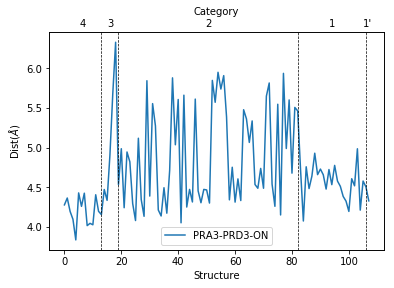

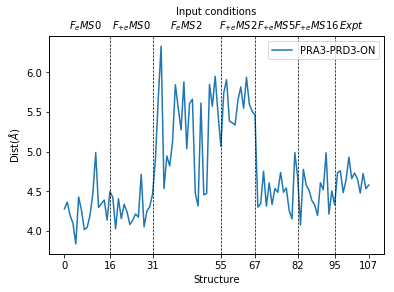

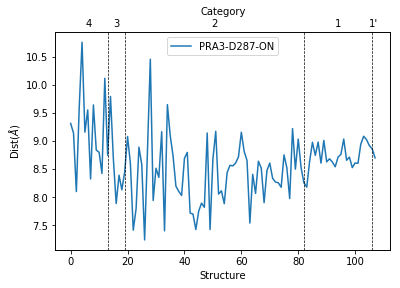

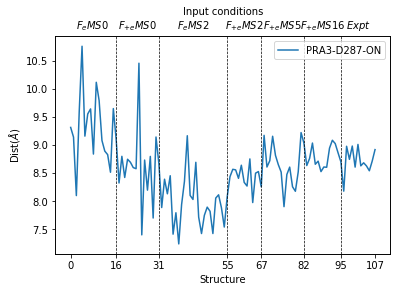

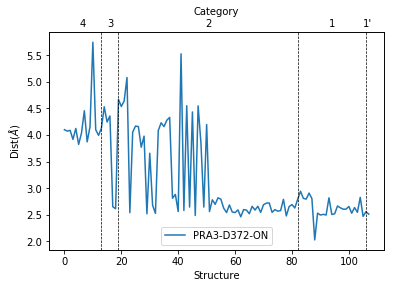

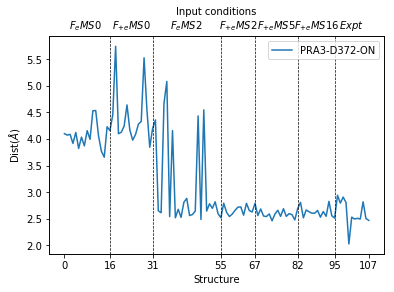

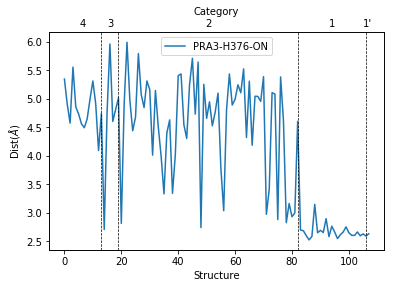

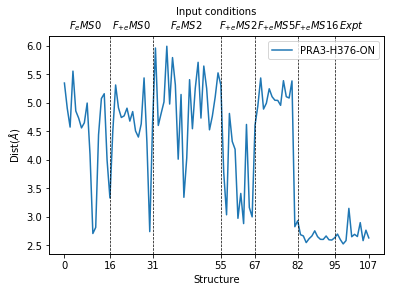

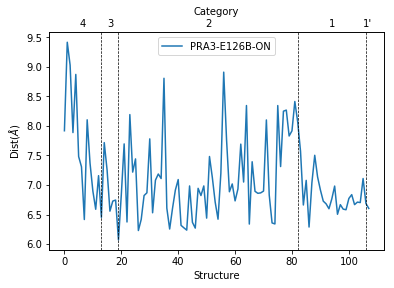

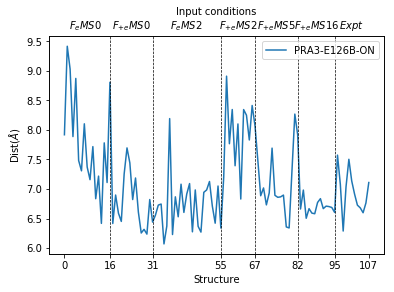

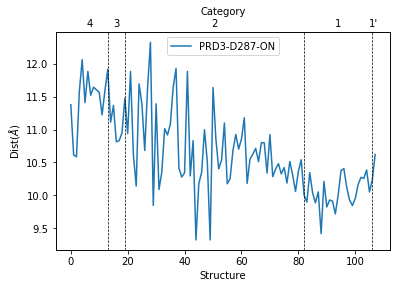

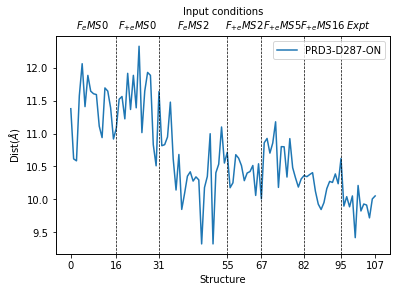

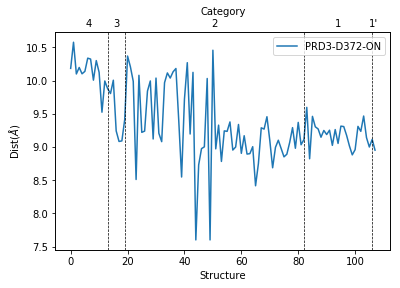

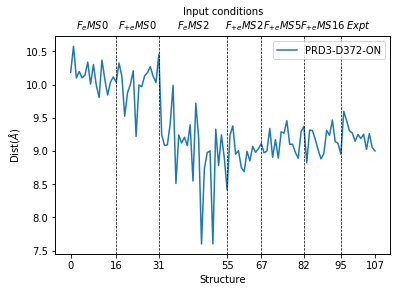

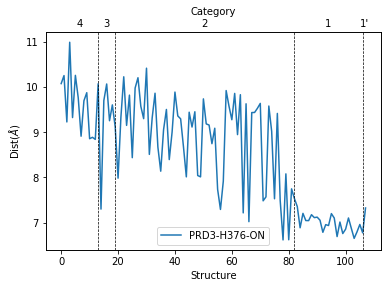

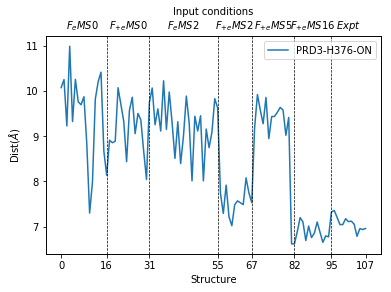

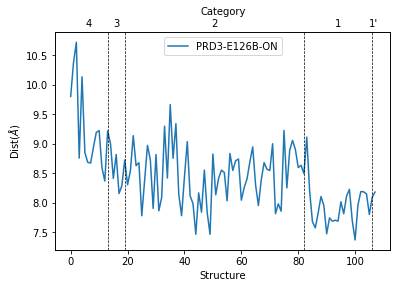

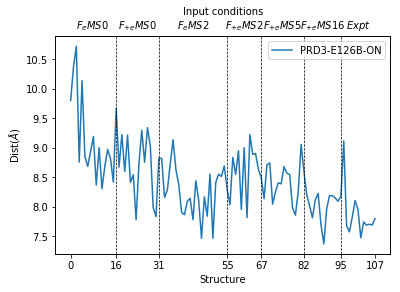

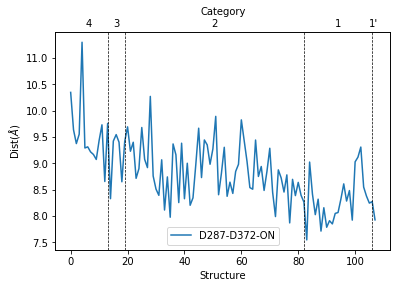

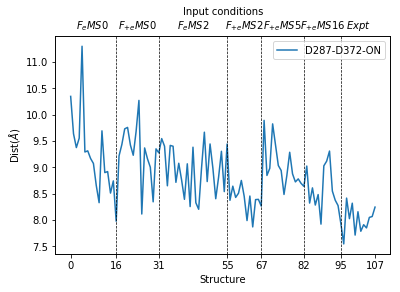

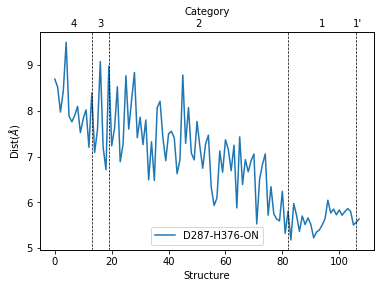

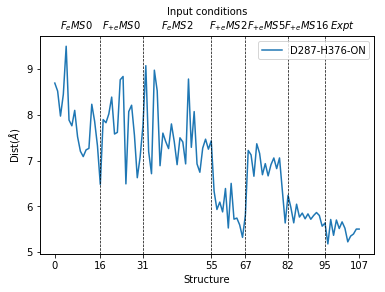

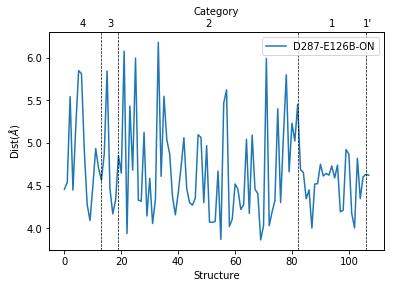

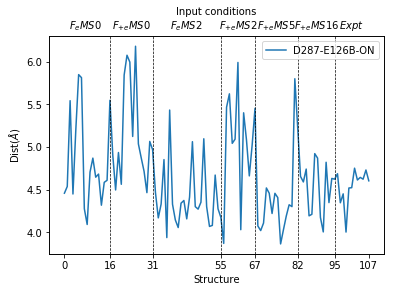

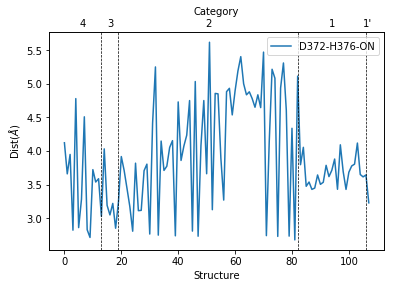

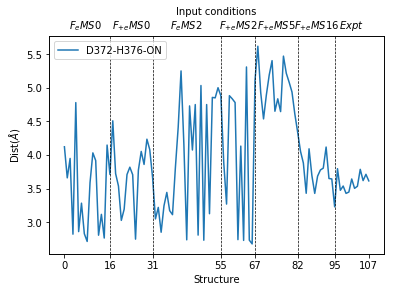

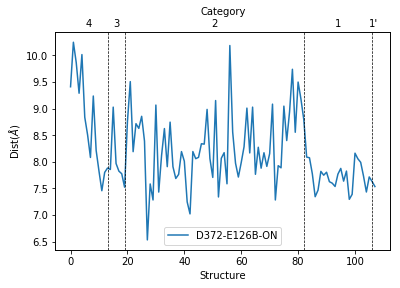

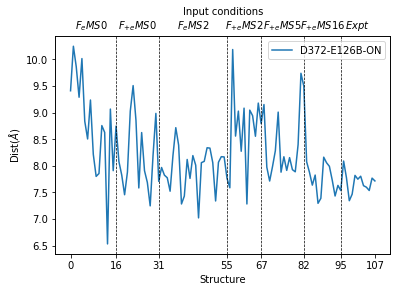

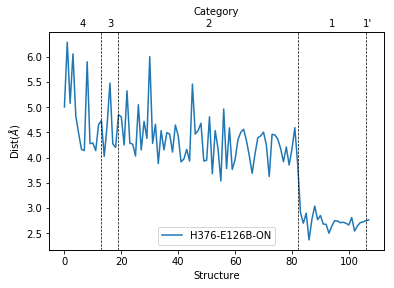

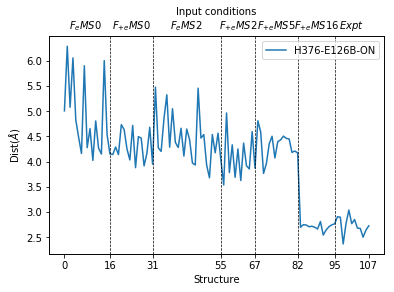

In [22]:
ress=['PRA3','PRD3','D287','D372','H376','E126B']
for key in itertools.combinations(ress,2):

    cc_i=distindex[key]['CC']
    on_i=distindex[key]['ON']
    '''
    plotdists([dists[cc_i[0]], mindist([ dists[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
             filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_cat.png')
    
    plotdists([dists2[cc_i[0]], mindist([ dists2[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_traj.png',
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
    '''
    plotdists([mindist([ dists[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ],
             filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_cat.png')
    
    plotdists([mindist([ dists2[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_traj.png',
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])

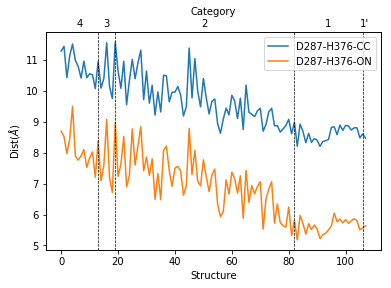

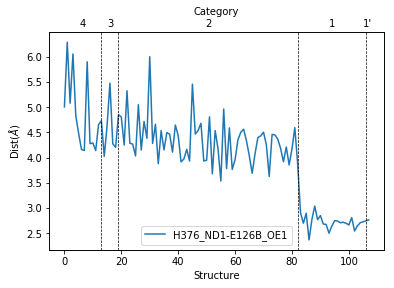

In [44]:
key=('D287', 'H376')
cc_i=distindex[key]['CC']
on_i=distindex[key]['ON']
plotdists([dists[cc_i[0]], mindist([ dists[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
         filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/D287H376.png')


plotdists([mindist([dists[145],dists[146],dists[148],dists[149]])], legends=[distnames[145]])



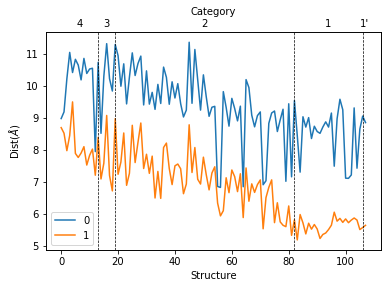

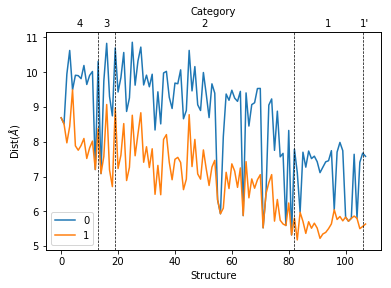

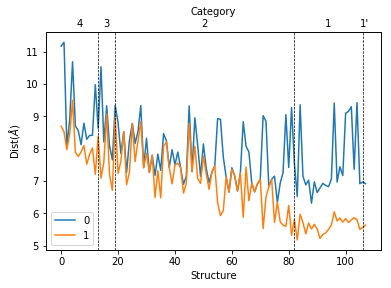

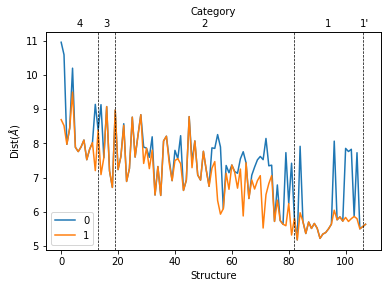

In [47]:
key=('D287', 'H376')  
cc_i=distindex[key]['CC']
on_i=distindex[key]['ON']
plotdists([dists[on_i[0]], mindist([ dists[i] for i in on_i])] ) # Asp OD1- His ND1
plotdists([dists[on_i[1]], mindist([ dists[i] for i in on_i])] ) # AspOD1-His NE2
plotdists([dists[on_i[2]],mindist([ dists[i] for i in on_i])] ) # AspOD2-HisND1
plotdists([dists[on_i[3]], mindist([ dists[i] for i in on_i])] ) # AspOD2-His NE2



In [288]:
'''
Plot merged distance figures
'''
import math

def plotdistsMerge(*args, **kwargs)->None:
    '''
    x: x axis
    y: y axis
    z: z axis to color each grid
    filename: filename to save the figure
    '''
    
    def helper(dists,ax, *args, **kwargs)->None:
        '''
        data: list of data points to plot, [[[],[]],[[],[]]]
        x_ticks: x axis to print out
        filename: filename to save the figure
        '''
        filename=kwargs.get('filename', None)
        x_ticks=kwargs.get('x_ticks',None)
        y_label=kwargs.get('y_label','Distance ($\AA$)')
        top_xlabel=kwargs.get('top_xlabel', 'Category')
        x_cat=kwargs.get('x_cat', [0,1,25, 88, 94, 107])
        x_cat_ticklabels=kwargs.get('x_cat_ticklabels', ['1\'','1','2', '3', '4'])
        legends=kwargs.get('legends', np.arange(0,len(dists),1))
        toplabel=kwargs.get('toplabel', False)
        ylabel=kwargs.get('ylabel', False)
        figlabel=kwargs.get('figlabel', None)
        hideytick=kwargs.get('hideytick', False)
        figlabel_pos=kwargs.get('figlabel_pos',[-0.05,1])
        ylim=kwargs.get('ylim', None)

        x_cat_minor=[]
    
        #reverse the category
        x_cat=-np.array(x_cat)+107
        for i in range(1,len(x_cat)):
            x_cat_minor.append((x_cat[i]+x_cat[i-1])/2)
    
        
        for i,dist in enumerate(dists):
            ax.plot(np.arange(0,len(dist),1),dist, label=legends[i])   
        
        if x_ticks:
            ax.set_xticks(x_ticks)
        if ylabel:
            ax.set_ylabel(y_label)
    
        
        xstart, xend=len(x_cat), 0
        for j, cat in enumerate(x_cat[1:]):   #plot division vertical lines    
            if 0 < cat < len(dist):
                xstart, xend=min(j, xstart), max(xend,j)      
                ax.axvline(x=cat,color='k', linestyle='--', lw=0.7)
        #ax.axhline(y=0,color='k', linestyle='--', lw=0.7)    
        
            #x axis on the top
        
        if toplabel:
            ax3 = ax.twiny()
            ax3.tick_params(axis="x", direction="in", length=0, width=2)
            ax3.set_xlim(ax.get_xlim())
            ax3.set_xticks(x_cat_minor[xstart: xend+2])            
            ax3.set_xticklabels(x_cat_ticklabels[xstart: xend+2], fontsize=10)
            ax3.set_xlabel(top_xlabel, fontsize=20)
            
                       
        
        ax.text(figlabel_pos[0], figlabel_pos[1], figlabel, transform=ax.transAxes,
                   fontsize=25, va='top', ha='right')
        ax.legend(loc='upper right', fontsize=12)
        
        
        ylimdown=math.floor(min(min(x) for x in y1))
        ylimup=math.ceil(max(max(x) for x in y1))
        #print(ylimdown, ylimup)
        ax.set_yticks(np.arange(ylimdown, ylimup, 1.0))
        
        ax.set_xlabel('Structure')
        if hideytick:
            ax.set_yticklabels([])
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)
    
    
    filename=kwargs.get('filename', None)
    
    
    #fig, axes=plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    fig, axes=plt.subplots(3,2,sharex=True,  gridspec_kw={'hspace': 0, 'wspace': 0.08}, figsize=(14,12))
    #label the figure
    figlabel=['A','B', 'C', 'D','E','F']
    
    ress=[[('D287', 'H376')], [('PRA3','D372'),('PRA3','H376')],[('H376','E126B')]]
    ress_name=[[('D287', 'H376')], [('PRA$_{a3}$','D372'),('PRA$_{a3}$','H376')],[('H376','E126B')]]
    for i, res in enumerate(ress):
        toplabel= True if i==0 else False
        on_is=[distindex[j]['ON'] for j in res]
        y1=[mindist([ dists[i] for i in on_i]) for on_i in on_is]
        y2= [mindist([ dists2[i] for i in on_i]) for on_i in on_is]
        
        
        
        helper(y1, axes[i,0], 
               toplabel=toplabel, ylabel=True,figlabel=figlabel[i*2],figlabel_pos=[-0.1, 1.1],
               legends=['-'.join(key) for key in ress_name[i]])
        helper(y2,axes[i,1], 
               toplabel=toplabel,legends=['-'.join(key) for key in ress_name[i] ],
                            top_xlabel='Input conditions',ylabel=False, figlabel=figlabel[i*2+1], hideytick=True,
                            x_cat=[0, 12,25, 40, 52, 76, 91,108],figlabel_pos=[-0.02, 1.1],
                            x_ticks=[0,16,31,55,67,82,95,107],
                            x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
    
    
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if filename:
        fig.savefig(filename, dpi=300,bbox_inches='tight')
    plt.show()

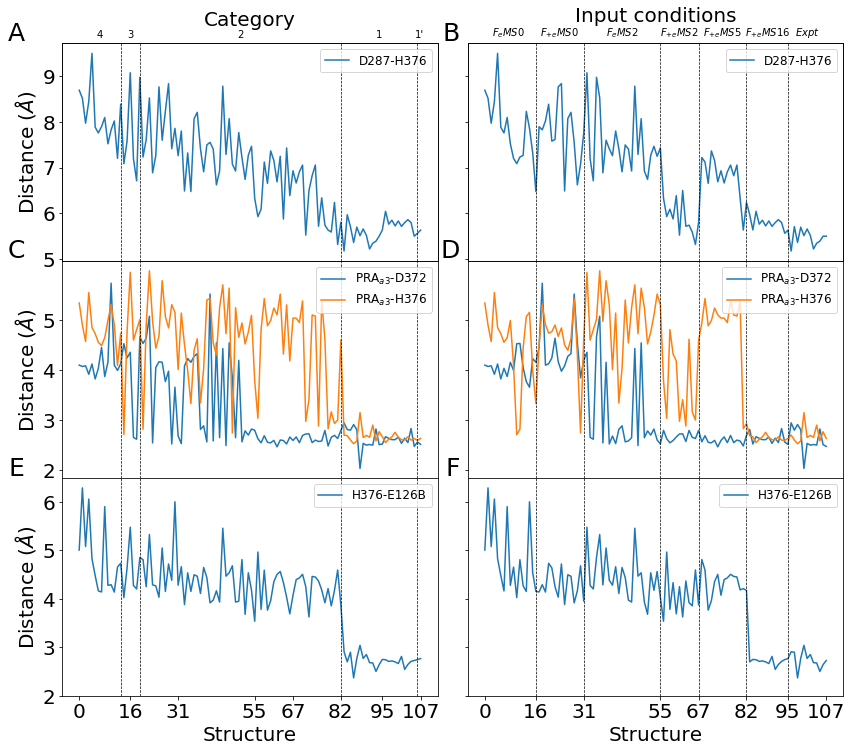

In [289]:
plotdistsMerge(filename=r'C:\Users\PC\Dropbox\cai\btype_cco\writing\submission\final_figtab\figure6.tiff')

In [186]:
ave_crg=[[-2.9825000000000004], [-2.9958333333333336, -2.9958333333333336, -2.9958333333333336, -2.9966666666666666, -2.9975, -2.9975, -2.9983333333333335, -2.999166666666667, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.000833333333333, -3.0016666666666665], [-3.035, -3.11, -3.170833333333334, -3.1799999999999997, -3.213333333333333, -3.308333333333333, -3.3141666666666665, -3.318333333333334, -3.3200000000000003, -3.345, -3.3516666666666666, -3.3608333333333333, -3.364166666666667, -3.3833333333333333, -3.435, -3.4566666666666666, -3.464166666666667, -3.4716666666666662, -3.515833333333333, -3.5250000000000004, -3.5558333333333327, -3.568333333333333, -3.6008333333333336, -3.624166666666667, -3.6308333333333334, -3.6774999999999998, -3.696666666666667, -3.7108333333333334, -3.7758333333333334, -3.784166666666667, -3.804166666666666, -3.805, -3.8058333333333327, -3.8516666666666666, -3.8525000000000005, -3.875833333333333, -3.8783333333333334, -3.881666666666666, -3.9041666666666663, -3.9108333333333327, -3.9266666666666663, -3.926666666666667, -3.9316666666666666, -3.9483333333333337, -3.9633333333333334, -3.965833333333333, -3.9700000000000006, -3.970833333333333, -3.970833333333333, -3.970833333333333, -3.9708333333333337, -3.9716666666666662, -3.975, -3.9808333333333334, -3.981666666666666, -3.986666666666667, -3.9874999999999994, -3.9891666666666663, -3.989166666666667, -3.99, -3.990833333333334, -3.9925, -3.9941666666666666], [-3.9975000000000005, -3.9983333333333335, -3.999166666666667, -4.0, -4.0008333333333335, -4.0025], [-4.011666666666667, -4.012499999999999, -4.014166666666667, -4.017500000000001, -4.0183333333333335, -4.024166666666667, -4.0249999999999995, -4.034166666666667, -4.0525, -4.153333333333333, -4.195, -4.246666666666667, -4.316666666666666, -4.399166666666667]]

deltaE_e1=[[13.253036499023438], [13.474533081054688, 13.7607421875, 13.287445068359375, 14.265899658203097, 14.5472412109375, 12.128540039062614, 11.501182556152287, 10.545928955078182, 12.508026123046903, 11.5332870483399, 12.202041625976562, 11.291549682617216, 12.734191894531193, 13.017074584960994, 13.360450744628906, 11.339096069336009, 12.467864990234318, 11.2421875, 9.28930664062591, 12.991516113281307, 13.00411987304679, 10.846885681152315, 11.037399291992188, 8.513229370117216], [5.152229309082031, 5.6747283935546875, 4.338768005371094, 4.4558563232421875, 4.314796447753906, 2.974334716796875, 5.60295867919919, 3.54229736328125, 4.328987121582031, 4.667381286621094, 4.28164672851571, 3.5489120483399006, 5.119712829589844, 4.140048980712891, 4.326744079589815, 4.920989990234375, 2.9347839355469034, 5.4574127197265625, 2.656387329101591, 4.561737060546918, 3.2410125732421875, 3.9795989990235086, 3.07861328125, 3.1387176513671875, 3.44818115234375, 1.675445556640625, 1.7583389282226562, 1.4961013793945312, 3.7367401123046875, 3.1448287963867045, 1.2615890502929688, 1.7979431152343466, 2.8185958862304688, 1.1816558837890625, 1.413864135742216, -0.4751739501953125, 0.12345886230470171, -1.0724716186524006, 0.5414733886718821, -0.16864013671875, -0.3127593994140625, 0.41042327880860796, -0.19252014160159092, -3.0895843505859375, -0.8860626220702983, -1.3052062988280966, -1.4117965698242188, -0.4920654296875, -1.3035354614257955, -2.2773284912109375, -2.018394470214801, -1.63629150390625, -1.3196640014648438, -2.0982894897460938, -1.7372817993164062, -1.7539443969726562, -2.2241210937499716, -1.7123870849608949, -2.0133285522460938, -3.3844146728515057, -2.5373840332030966, -2.1445465087890057, -2.9851150512694886], [-3.320182800292997, -3.0207061767577983, -3.7451934814453125, -3.6625442504882812, -2.861877441406307, -4.4143829345703125], [-3.6961898803710938, -2.656463623046875, -2.9628524780273438, -1.9457473754882812, -3.3905105590820312, -3.226089477539105, -3.5898895263671875, -3.1038818359375, -2.9956741333007955, -2.9760513305664062, -4.202751159667969, -3.1002197265625, -3.145896911621108, -4.098793029785156]]

ave_crgs=[j for i in ave_crg for j in i][::-1]
deltaEs_e1= [j for i in deltaE_e1 for j in i][::-1]

def plot2lists(list1, list2, *args, **kwargs)->None:
    '''
    data: list of data points to plot, [[[],[]],[[],[]]]
    x_ticks: x axis to print out
    filename: filename to save the figure
    '''
    filename=kwargs.get('filename', None)
    x_ticks=kwargs.get('x_ticks',None)
    y_label=kwargs.get('y_label','Dist($\AA$)')
    x_label=kwargs.get('x_label','x')
    
    fig, ax=plt.subplots()
    
    ax.plot(list1,list2,'o-')   
        
    if x_ticks:
        ax.set_xticks(x_ticks)
    ax.set_ylabel(y_label)
                       
    ax.set_xlabel(x_label)
    
    
    if filename:
        fig.savefig(filename, dpi=300,bbox_inches='tight')
    plt.show()

plot2lists(np.arange(0, len(strucs),1),mindist([ dists[i] for i in on_i]), x_label='Structure',
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/D287H376_1.png')    
plot2lists(ave_crgs,mindist([ dists[i] for i in on_i]), x_label='Ionization state',
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/D287H376_2.png')
plot2lists(deltaEs_e1,mindist([ dists[i] for i in on_i]), x_label=r'$\bigtriangleup$$\bigtriangleup$$G^{E_e}_{UL-L}$',
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/D287H376_3.png')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/D287H376_1.png'

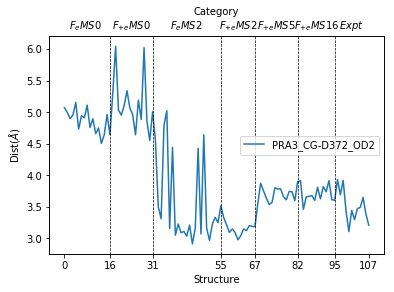

In [233]:
index=10
plotdists([dists2[index]], legends=[distnames[index]],
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])

Estimated coefficients:
b_0 = 8.40904909657178
b_1 = -0.028393150512861627


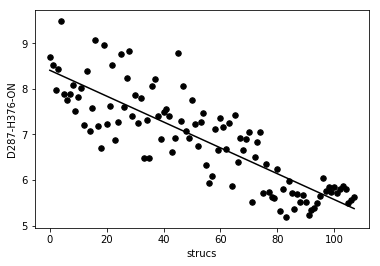

In [320]:
'''
Fitting the D287 and H376 distance
'''

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

def plot_regression_line(x, y, b,x_label='x',y_label='y', *args, **kwargs): 
    
    filename=kwargs.get('filename', None)
    
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color='black',
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "k") 
  
    # putting labels 
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 
    
    #save the figure
    if filename:
        plt.savefig(filename, dpi=300,bbox_inches='tight')
  
    # function to show plot 
    plt.show() 
    
    
def main(x,y,x_label='x',y_label='y', *args, **kwargs): 
    filename=kwargs.get('filename', None)
    
    # observations 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line
    plot_regression_line(x, y, b, x_label, y_label, filename=filename) 
  
if __name__ == "__main__": 
    
    
    key=('D287', 'H376')
    cc_i=distindex[key]['CC']
    on_i=distindex[key]['ON']
    
    
    main(np.arange(0,108,1),mindist([ dists[i] for i in on_i]), \
         x_label='strucs',\
         y_label='D287-H376-ON') 
    


# Plot D372-PRA3, H376-PRA, E126B-H376, D287, H376 dists 

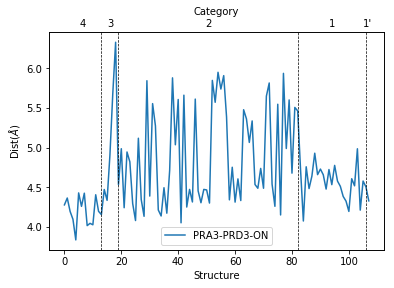

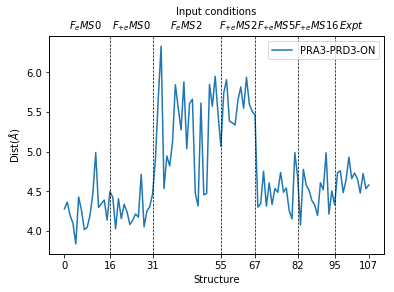

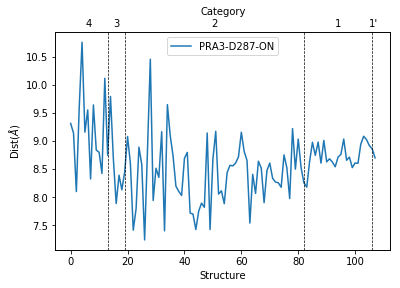

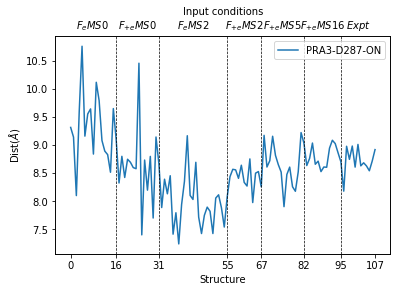

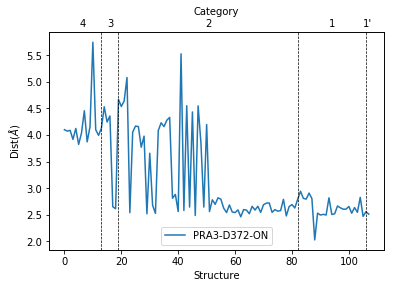

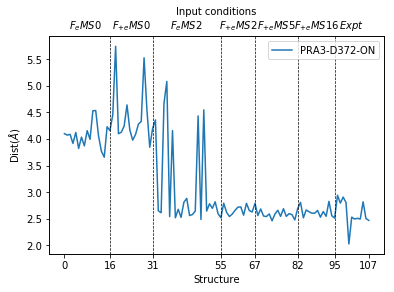

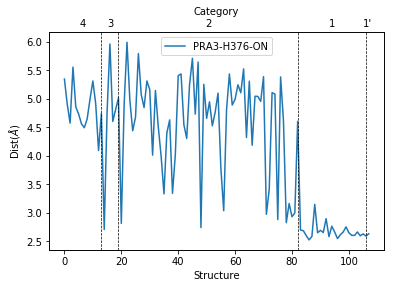

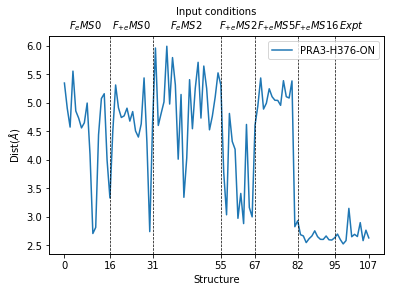

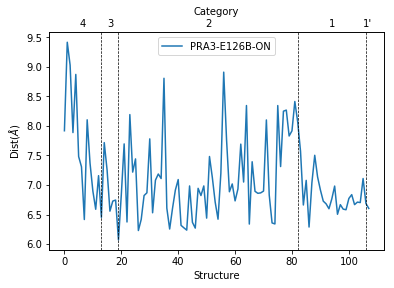

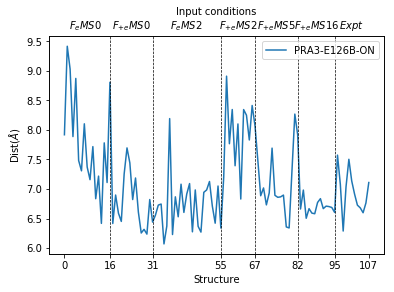

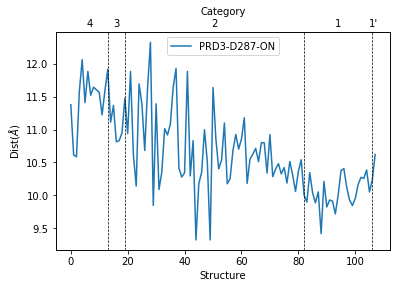

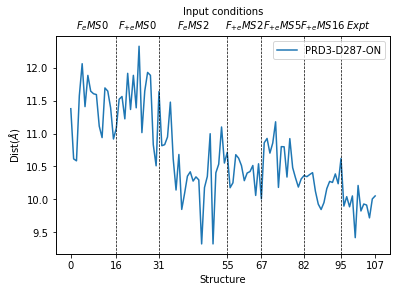

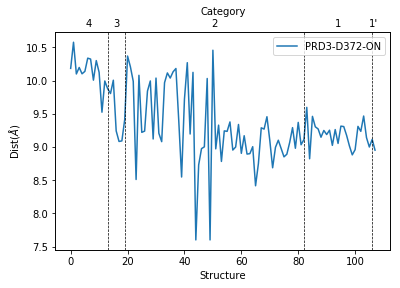

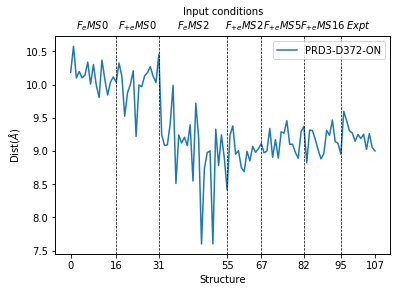

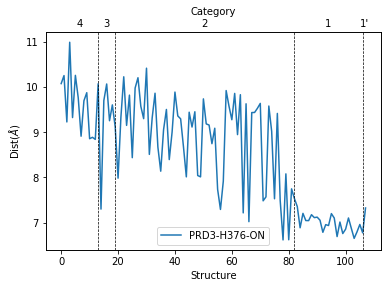

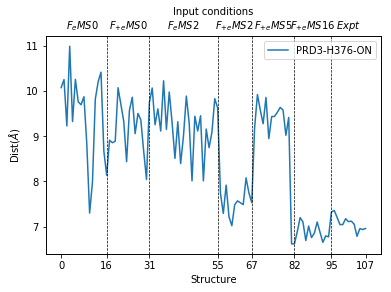

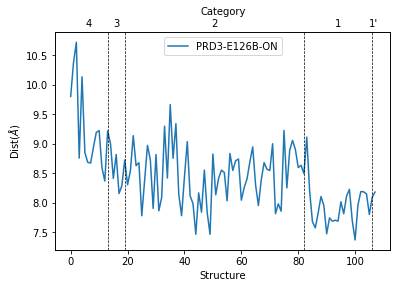

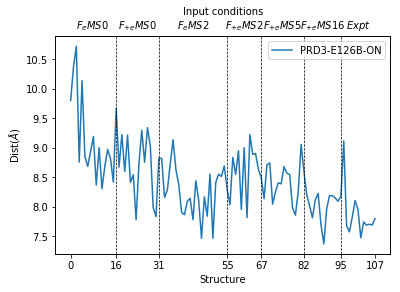

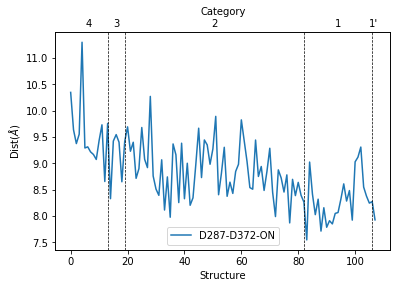

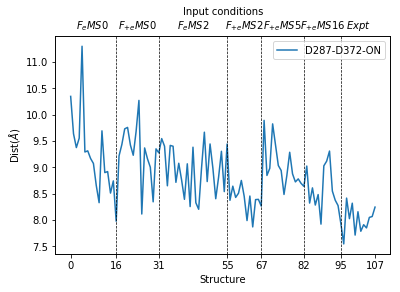

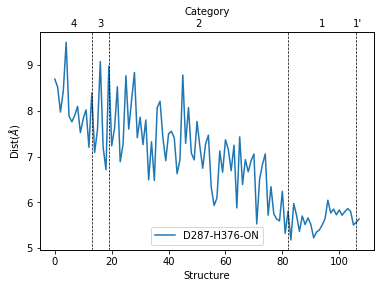

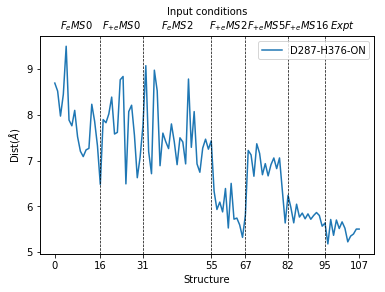

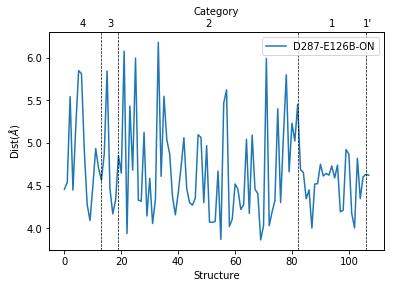

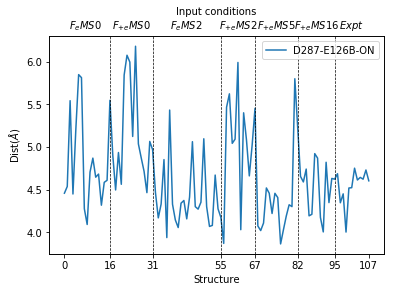

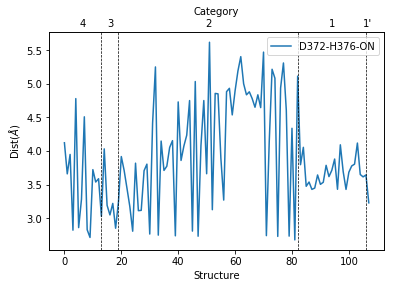

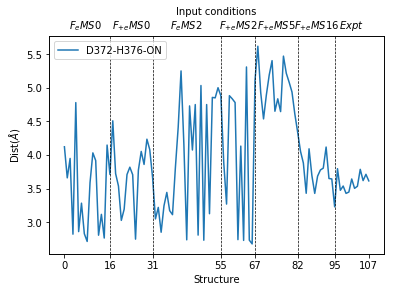

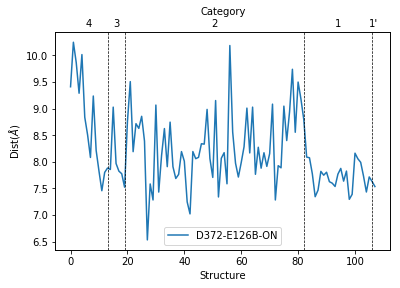

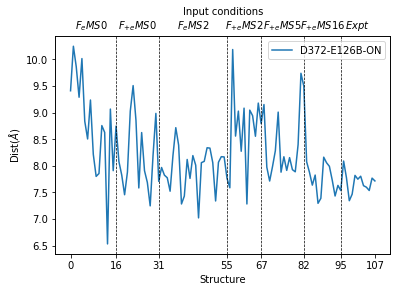

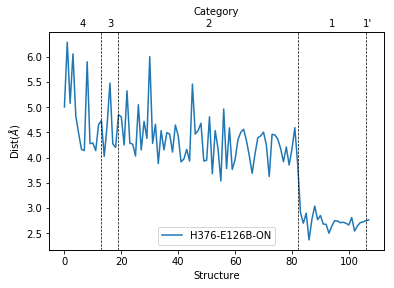

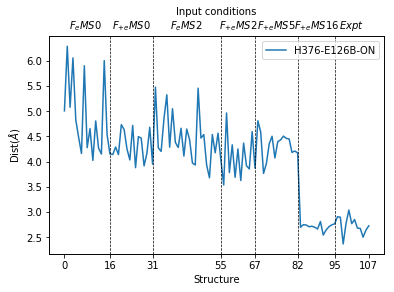

In [26]:
ress=['PRA3','PRD3','D287','D372','H376','E126B']
for key in itertools.combinations(ress,2):

    cc_i=distindex[key]['CC']
    on_i=distindex[key]['ON']
    '''
    plotdists([dists[cc_i[0]], mindist([ dists[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
             filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_cat.png')
    
    plotdists([dists2[cc_i[0]], mindist([ dists2[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_traj.png',
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
    '''
    plotdists([mindist([ dists[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ]
             )
    
    plotdists([mindist([ dists2[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ],
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])

# Plot the dist between Arg225 and Asp287 for all investegated structures


In [23]:
dataset2=[cluster_collection1_2, cluster_collection2_2, cluster_collection4_2, \
          cluster_collection5_2, cluster_collection6_2, cluster_collection7_2]
datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']
universes=[u1, u2, u4, u5,u6,u7]
R225D287_dists={} # store the pls self-distances for each centroid of cluster

pls_select_list=[[219, 219, 219, 219, 281, 281, 281],
                 ['A', 'A', 'A', 'A', 'A','A', 'A'],
                 ['ARG', 'ARG','ARG','ARG','ASP','ASP','ASP'],
                 ['CZ','NE','NH1','NH2', 'CG','OD1','OD2']]
pls_selects=createplsselect(pls_select_list[0],pls_select_list[1],pls_select_list[2],pls_select_list[3])

print(pls_selects)



for i in range(len(universes)):
    universe=universes[i]
    clusters=dataset2[i]
    label=datalabel[i]
    PlsSelfDist(universe,clusters,label, R225D287_dists, pls_selects)
    
    
    
cry_name= ["1ehk","1xme","4gp4","4gp5","3eh3","3eh5","3s3b","3s3d","3eh4","3s3a","3s3c","3s8f"]
inputpaths=r'C:/Users/PC/Dropbox/cai/btype_cco/snapshot/xray_protpdb/nolip'

#pls_select_list2=[[None, None, 287, 372, 376, 126],[None, None, 'A', 'A','A','B' ],
#                 ['HAS', 'HAS', 'ASP', 'ASP','HIS','GLU'],['CGA','CGD','CG','CG','CG','CD']]

pls_select_list2=[[225, 225, 225, 225, 287, 287, 287],
                 ['A', 'A', 'A', 'A', 'A','A', 'A'],
                 ['ARG', 'ARG','ARG','ARG','ASP','ASP','ASP'],
                 ['CZ','NE','NH1','NH2', 'CG','OD1','OD2']]

pls_selects2=createplsselect(pls_select_list2[0],pls_select_list2[1],pls_select_list2[2],pls_select_list2[3])

print(pls_selects2)

for cry in cry_name:
    filepath=inputpaths+r'/'+ cry+r'.pdb'
    ucry = mda.Universe(filepath)
    PlsSelfDistCry(ucry,cry, R225D287_dists,pls_selects2)

['resid 219 and segid A and resname ARG and name CZ', 'resid 219 and segid A and resname ARG and name NE', 'resid 219 and segid A and resname ARG and name NH1', 'resid 219 and segid A and resname ARG and name NH2', 'resid 281 and segid A and resname ASP and name CG', 'resid 281 and segid A and resname ASP and name OD1', 'resid 281 and segid A and resname ASP and name OD2']
['resid 225 and segid A and resname ARG and name CZ', 'resid 225 and segid A and resname ARG and name NE', 'resid 225 and segid A and resname ARG and name NH1', 'resid 225 and segid A and resname ARG and name NH2', 'resid 287 and segid A and resname ASP and name CG', 'resid 287 and segid A and resname ASP and name OD1', 'resid 287 and segid A and resname ASP and name OD2']


C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\PDBParser.py:369: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  "PDB file contained CONECT record to TER entry. "


In [24]:
R225D287=exportdist(R225D287_dists, strucs[::-1])  #distances sorted in Category sequence
R225D287_2=exportdist(R225D287_dists, strucs2[::-1])  #distances sorted in Input conditions sequence

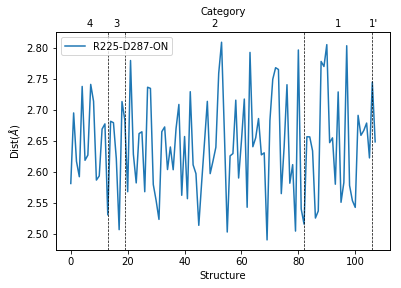

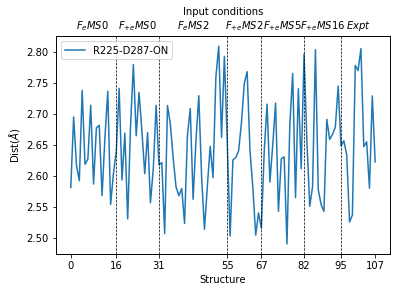

In [25]:
saltb=['R225_CZ','R225_NE','R225_NH1','R225_NH2',
     'D287_CG','D287_OD1','D287_OD2']

saltbcombs=itertools.combinations(saltb,2)
saltbnames={}

saltbindex={} # dictionary:{(Res1,res2):{'CC':[index], 'ON':[indexes]}}
for i, saltbcomb in enumerate(saltbcombs):
    res1,res2=saltbcomb
    resn1, atom1=res1.split('_')
    resn2,atom2=res2.split('_')
    if (resn1,resn2) not in saltbindex:
        saltbindex[resn1,resn2]={'CC':[], 'ON':[]}
    if atom1[0]=='C' and atom2[0]=='C':
        saltbindex[resn1,resn2]['CC'].append(i)
    elif (atom1[0]=='O' or atom1[0]=='N') and (atom2[0]=='O' or atom2[0]=='N'):
        saltbindex[resn1,resn2]['ON'].append(i)
    
    saltbnames[i]=distcomb[0]+'-'+distcomb[1]

    
ress=['R225','D287']
for key in itertools.combinations(ress,2):

    cc_i=saltbindex[key]['CC']
    on_i=saltbindex[key]['ON']
    '''
    plotdists([R225D287[cc_i[0]], mindist([ R225D287[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
             filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_cat.png')
    
    plotdists([R225D287_2[cc_i[0]], mindist([ R225D287_2[i] for i in on_i]) ], legends=['-'.join(key)+'-CC','-'.join(key)+'-ON' ],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_traj.png',
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])
    '''
    plotdists([mindist([ R225D287[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ],
             filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_cat.png')
    
    plotdists([mindist([ R225D287_2[i] for i in on_i]) ], legends=['-'.join(key)+'-ON' ],
          filename=r'/Users/PC/Dropbox/cai/btype_cco/crg_data/figures/dists/'+key[0]+key[1]+'_traj.png',
              top_xlabel='Input conditions',
         x_cat=[0, 12,25, 40, 52, 76, 91,108],\
          x_ticks=[0,16,31,55,67,82,95,107],
        x_cat_ticklabels= ['$Expt$','$F_{+e}MS16$','$F_{+e}MS5$', '$F_{+e}MS2$', '$F_eMS2$', '$F_{+e}MS0$', '$F_eMS0$'])

In [76]:
R225D287_dists['3eh4'][3]

4.114454435236915

# *DO CLUSTERING FOR THE 50NS P4 TRAJECTORY

In [5]:
u7_50ns = mda.Universe(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\4_dpdro3\md_nvt_init.pdb',\
                  r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\4_dpdro3\md_nvt_25ns_100.dcd',\
                       r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\Btype_CcO_MD\Btype_MD\4_dpdro3\md_nvt_50ns_100.dcd' )


cluster_collection7_1_50ns = MDAnalysis.analysis.encore.cluster(u7_50ns)
cluster_collection7_2_50ns= MDAnalysis.analysis.encore.cluster(u7_50ns, selection='(backbone and segid A and (resid 370 or resid 366 or resid 281)) \
                                           or (backbone and resid 124 and segid B and resname GLU) or\
                                           (resid 1 and segid A and resname HEM and not type H)' )

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\MDAnalysis\topology\guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: Cl
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [6]:
cluster_collection7_2

0 (size:8,centroid:2): array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)
1 (size:12,centroid:25): array([10, 12, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26], dtype=int64)
2 (size:14,centroid:32): array([ 8, 13, 14, 18, 21, 27, 28, 29, 30, 31, 32, 33, 34, 43],
      dtype=int64)
3 (size:19,centroid:45): array([ 36,  37,  39,  41,  42,  45,  46,  48,  52,  54,  66,  86,  95,
       203, 212, 232, 234, 241, 243], dtype=int64)
4 (size:15,centroid:50): array([ 38,  44,  47,  49,  50,  56,  62,  70,  71,  73,  75,  82,  84,
       124, 156], dtype=int64)
5 (size:12,centroid:64): array([55, 59, 61, 64, 65, 67, 68, 69, 72, 74, 76, 79], dtype=int64)
6 (size:21,centroid:113): array([ 99, 102, 103, 105, 106, 108, 110, 111, 113, 115, 116, 117, 118,
       119, 130, 144, 147, 157, 162, 192, 217], dtype=int64)
7 (size:19,centroid:129): array([ 51,  53,  77,  85,  96, 129, 136, 138, 159, 178, 180, 181, 200,
       201, 224, 228, 240, 248, 249], dtype=int64)
8 (size:24,centroid:131): array([ 35,  83,  88,  89,

In [7]:
cluster_collection7_2_50ns

0 (size:8,centroid:2): array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)
1 (size:13,centroid:25): array([10, 12, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 42], dtype=int64)
2 (size:17,centroid:32): array([  8,  13,  14,  18,  21,  27,  28,  29,  30,  31,  32,  33,  34,
        39,  41,  43, 203], dtype=int64)
3 (size:24,centroid:50): array([ 35,  37,  38,  45,  46,  47,  48,  49,  50,  52,  54,  56,  62,
        70,  71,  73,  75,  82,  84, 156, 227, 262, 265, 266], dtype=int64)
4 (size:12,centroid:64): array([55, 59, 61, 64, 65, 67, 68, 69, 72, 74, 76, 79], dtype=int64)
5 (size:35,centroid:113): array([ 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 113,
       114, 115, 116, 117, 118, 119, 130, 144, 147, 149, 150, 157, 162,
       163, 191, 192, 217, 219, 377, 388, 401, 491], dtype=int64)
6 (size:25,centroid:129): array([ 51,  53,  85,  96, 129, 136, 138, 159, 178, 180, 181, 200, 201,
       224, 228, 240, 249, 251, 253, 270, 271, 272, 291, 294, 358],
      dtype=int64)
7 (size:

In [10]:
#save clusters data in file
universes=[u7_50ns]
datalabel=['p4_50ns']
dataset1=[ cluster_collection7_1_50ns]
dataset2=[ cluster_collection7_2_50ns]

outputpath1=r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\p4_50ns\all_CA'
with open(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\p4_50ns\clusters_all_CA.txt','w') as f:
    f.write('Clustering by selection \'name CA\': \n')
    for i, cluster_collection in enumerate(dataset1):
        f.write('\n')
        f.write(datalabel[i]+':\n')
        for cluster in cluster_collection:
            f.write(str(cluster.id) +' ' + '(size: '+ str(cluster.size)+', centroid: '+ str(cluster.centroid)\
                   + ') elements: ' + str(cluster.elements)+'\n') 
            
            #output centroid snapshot to pdb format
            time_point=cluster.centroid
            universes[i].trajectory[time_point]
            with mda.Writer(outputpath1+'/'+datalabel[i]+'_'+str(time_point)+'_frame.pdb') as pdb:
                pdb.write(universes[i])

In [11]:
outputpath2=r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\p4_50ns\PLS'
with open(r'C:\Users\PC\Dropbox\cai\btype_cco\snapshot\clustering\p4_50ns\clusters_PLS.txt','w') as f:
    f.write('Clustering by selection \'PLS\': \n')
    for i, cluster_collection in enumerate(dataset2):
        f.write('\n')
        f.write(datalabel[i]+':\n')
        for cluster in cluster_collection:
            f.write(str(cluster.id) +' ' + '(size: '+ str(cluster.size)+', centroid: '+ str(cluster.centroid)\
                   + ') elements: ' + str(cluster.elements)+'\n') 
            
            #output centroid snapshot to pdb format
            time_point=cluster.centroid
            universes[i].trajectory[time_point]
            with mda.Writer(outputpath2+'/'+datalabel[i]+'_'+str(time_point)+'_frame.pdb') as pdb:
                pdb.write(universes[i])

# Asp287- His376 distance along the whole trajectories

In [22]:
def PlsSelfDistWholetraj(universe, label, self_dists_wholetraj,pls_select):
    '''
    output pls distance from the centroid in each cluster.
    
    universe: md universe
    clusters: md clustering on trajectory
    label: name of the trajectory
    '''
    #pls=universe.select_atoms('(name CG and segid A and (resid 370 or resid 366 or resid 281)) \
    #                                       or (name CD and resid 124 and segid B and resname GLU) or\
    #                                       ((name CGA or name CGD) and resid 1 and segid A and resname HEM and not type H)')
    self_dists_wholetraj[label]=[]
    pls=[]
    for i in pls_select:
        pls.extend(universe.select_atoms(i))
    
    pls=mda.AtomGroup(pls)   
    #print(pls.positions)
    
    
    for ts in universe.trajectory:
        
        self_dists_wholetraj[label].append(mda.lib.distances.self_distance_array(pls.positions))
    

    



datalabel=['d372p', 'd372ph376p', 'p1', 'p2', 'p3', 'p4']
universes=[u1, u2, u4, u5,u6,u7]
self_dists_wholetraj={} # store the pls self-distances for each centroid of cluster

pls_select_list=[[1, 1,1,1,1,1,281, 281,281, 366,366,366, 370,370,370, 124, 124,124],
                 ['A', 'A', 'A', 'A', 'A','A', 'A','A','A', 'A','A', 'A','A','A','A','B','B','B' ],
                 ['HEM', 'HEM','HEM','HEM','HEM','HEM','ASP','ASP','ASP', 'ASP','ASP', 'ASP','HIS','HIS','HIS','GLU','GLU','GLU'],
                 ['CGA','O1A','O2A','CGD','O1D','O2D','CG','OD1','OD2', 'CG','OD1','OD2','CG','ND1','NE2','CD','OE1','OE2']]
pls_selects=createplsselect(pls_select_list[0],pls_select_list[1],pls_select_list[2],pls_select_list[3])

print(pls_selects)




for i in range(len(universes)):
    universe=universes[i]
    label=datalabel[i]
    PlsSelfDistWholetraj(universe,label, self_dists_wholetraj, pls_selects)

['resid 1 and segid A and resname HEM and name CGA', 'resid 1 and segid A and resname HEM and name O1A', 'resid 1 and segid A and resname HEM and name O2A', 'resid 1 and segid A and resname HEM and name CGD', 'resid 1 and segid A and resname HEM and name O1D', 'resid 1 and segid A and resname HEM and name O2D', 'resid 281 and segid A and resname ASP and name CG', 'resid 281 and segid A and resname ASP and name OD1', 'resid 281 and segid A and resname ASP and name OD2', 'resid 366 and segid A and resname ASP and name CG', 'resid 366 and segid A and resname ASP and name OD1', 'resid 366 and segid A and resname ASP and name OD2', 'resid 370 and segid A and resname HIS and name CG', 'resid 370 and segid A and resname HIS and name ND1', 'resid 370 and segid A and resname HIS and name NE2', 'resid 124 and segid B and resname GLU and name CD', 'resid 124 and segid B and resname GLU and name OE1', 'resid 124 and segid B and resname GLU and name OE2']


In [23]:
len(self_dists_wholetraj['d372p'][0])

153

In [24]:
distindex

{('D287', 'D287'): {'CC': [], 'ON': [98]},
 ('D287', 'D372'): {'CC': [89], 'ON': [100, 101, 109, 110]},
 ('D287', 'E126B'): {'CC': [95], 'ON': [106, 107, 115, 116]},
 ('D287', 'H376'): {'CC': [92], 'ON': [103, 104, 112, 113]},
 ('D372', 'D372'): {'CC': [], 'ON': [125]},
 ('D372', 'E126B'): {'CC': [122], 'ON': [130, 131, 136, 137]},
 ('D372', 'H376'): {'CC': [119], 'ON': [127, 128, 133, 134]},
 ('E126B', 'E126B'): {'CC': [], 'ON': [152]},
 ('H376', 'E126B'): {'CC': [140], 'ON': [145, 146, 148, 149]},
 ('H376', 'H376'): {'CC': [], 'ON': [143]},
 ('PRA3', 'D287'): {'CC': [5], 'ON': [22, 23, 37, 38]},
 ('PRA3', 'D372'): {'CC': [8], 'ON': [25, 26, 40, 41]},
 ('PRA3', 'E126B'): {'CC': [14], 'ON': [31, 32, 46, 47]},
 ('PRA3', 'H376'): {'CC': [11], 'ON': [28, 29, 43, 44]},
 ('PRA3', 'PRA3'): {'CC': [], 'ON': [17]},
 ('PRA3', 'PRD3'): {'CC': [2], 'ON': [19, 20, 34, 35]},
 ('PRD3', 'D287'): {'CC': [50], 'ON': [64, 65, 76, 77]},
 ('PRD3', 'D372'): {'CC': [53], 'ON': [67, 68, 79, 80]},
 ('PRD3', '

d372p


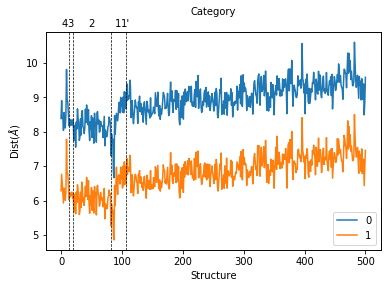

d372ph376p


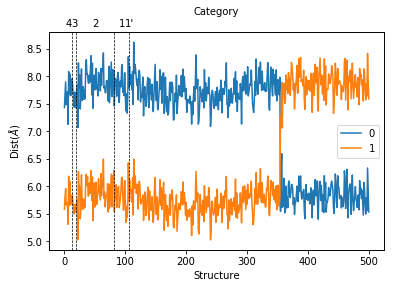

p1


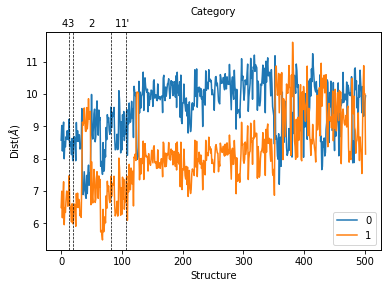

p2


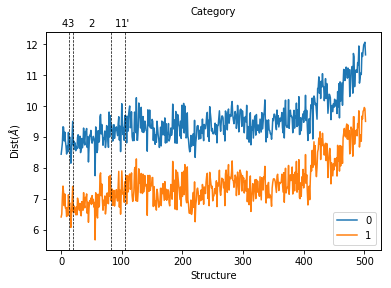

p3


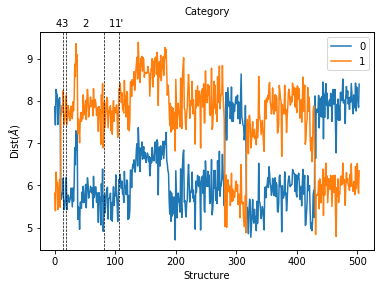

p4


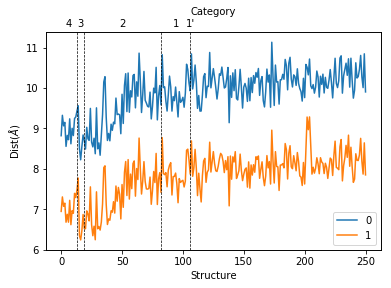

In [33]:
#D287 O -H372(any N atom)
for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([mindist([list(zip(*dist))[103], list(zip(*dist))[104]]),  # AspOD1-HisN
               mindist([list(zip(*dist))[112],list(zip(*dist))[113]])])  # AspOD2-HisN 
        
        
    

d372p


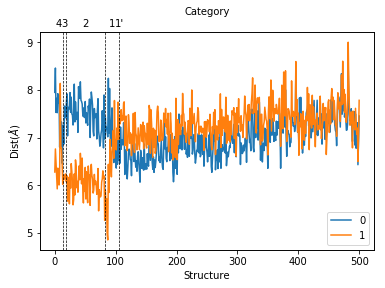

d372ph376p


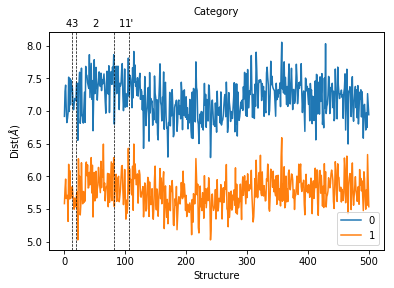

p1


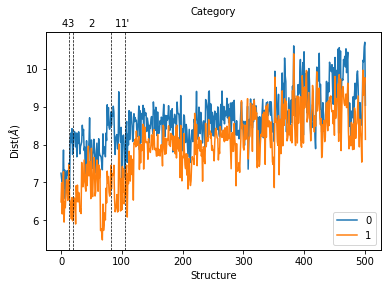

p2


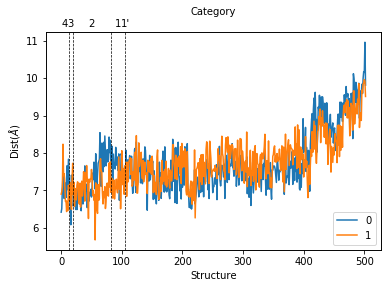

p3


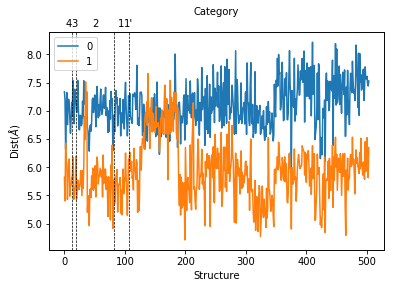

p4


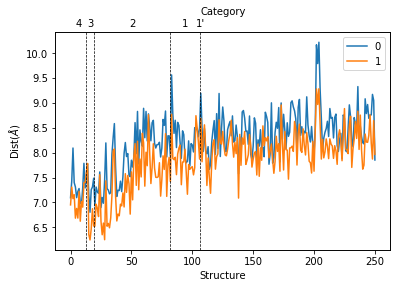

In [35]:
#D287 (any O) -H372(N atom)
for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([mindist([list(zip(*dist))[103], list(zip(*dist))[112]]),  # AspO-HisND1
               mindist([list(zip(*dist))[104],list(zip(*dist))[113]])])  # AspO-HisNE2 

d372p: D287 OD1- H376 ND1 is leading for 0 times.
d372p: D287 OD1- H376 NE2 is leading for 0 times.
d372p: D287 OD2- H376 ND1 is leading for 359 times.
d372p: D287 OD2- H376 NE2 is leading for 142 times.
d372ph376p: D287 OD1- H376 ND1 is leading for 0 times.
d372ph376p: D287 OD1- H376 NE2 is leading for 146 times.
d372ph376p: D287 OD2- H376 ND1 is leading for 0 times.
d372ph376p: D287 OD2- H376 NE2 is leading for 355 times.
p1: D287 OD1- H376 ND1 is leading for 6 times.
p1: D287 OD1- H376 NE2 is leading for 84 times.
p1: D287 OD2- H376 ND1 is leading for 29 times.
p1: D287 OD2- H376 NE2 is leading for 383 times.
p2: D287 OD1- H376 ND1 is leading for 0 times.
p2: D287 OD1- H376 NE2 is leading for 0 times.
p2: D287 OD2- H376 ND1 is leading for 280 times.
p2: D287 OD2- H376 NE2 is leading for 223 times.
p3: D287 OD1- H376 ND1 is leading for 36 times.
p3: D287 OD1- H376 NE2 is leading for 348 times.
p3: D287 OD2- H376 ND1 is leading for 1 times.
p3: D287 OD2- H376 NE2 is leading for 119 ti

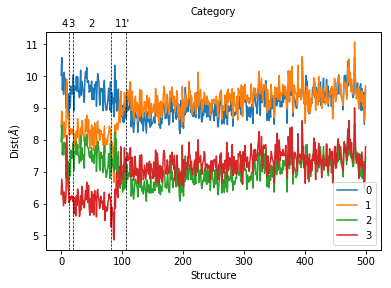

d372ph376p


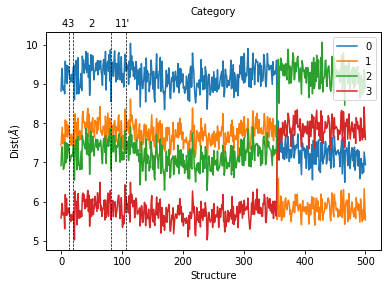

p1


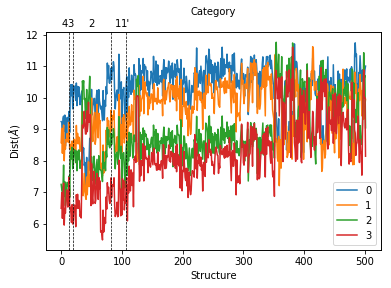

p2


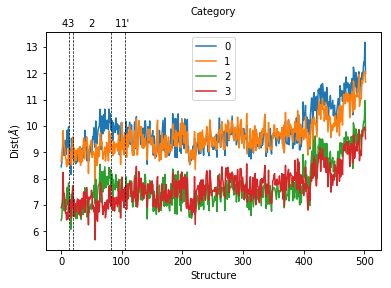

p3


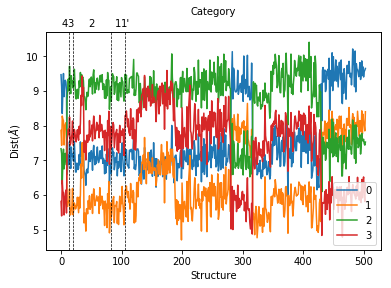

p4


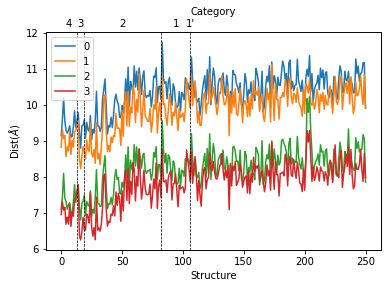

In [52]:
#D287 (any O) -H372(any N atom)
key=('D287', 'H376')  
cc_i=distindex[key]['CC']
on_i=distindex[key]['ON']
c1,c2,c3,c4=0,0,0,0
for traj, dist in self_dists_wholetraj.items():
    c1,c2,c3,c4=0,0,0,0
    for index, x in enumerate(mindist([list(zip(*dist))[i] for i in on_i])):
        if list(zip(*dist))[on_i[0]][index]== x:
            c1 +=1
        elif list(zip(*dist))[on_i[1]][index]== x:
            c2 +=1
        elif list(zip(*dist))[on_i[2]][index]== x:
            c3 +=1
        else:
            c4 +=1
    print("%s: %s OD1- %s ND1 is leading for %d times." % (traj, key[0], key[1], c1))
    print("%s: %s OD1- %s NE2 is leading for %d times." % (traj, key[0], key[1], c2))
    print("%s: %s OD2- %s ND1 is leading for %d times." % (traj, key[0], key[1], c3))
    print("%s: %s OD2- %s NE2 is leading for %d times." % (traj, key[0], key[1], c4))

for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([list(zip(*dist))[103], list(zip(*dist))[104],  # AspOD1-HisN
               list(zip(*dist))[112],list(zip(*dist))[113]])  # AspOD2-HisN 

d372p


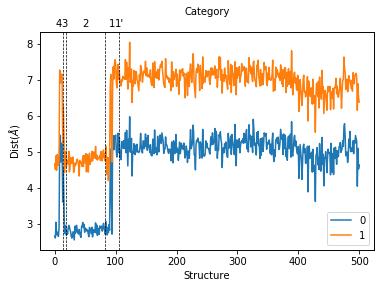

d372ph376p


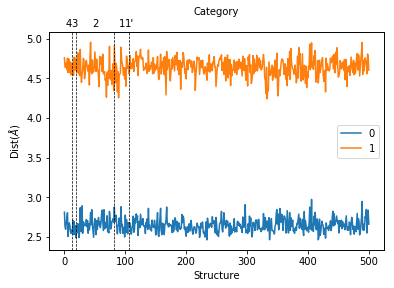

p1


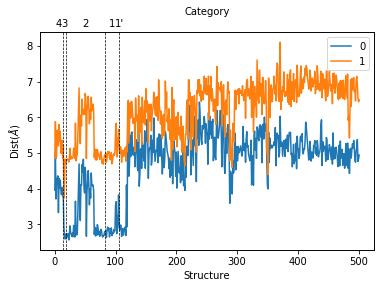

p2


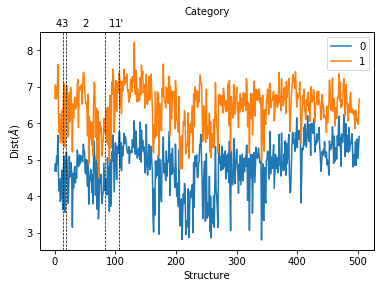

p3


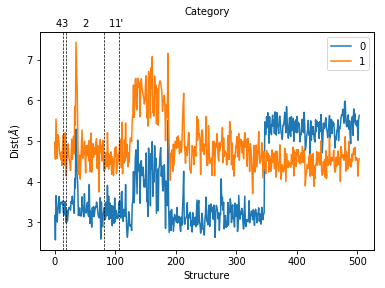

p4


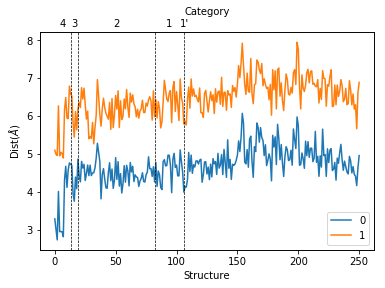

In [37]:
#PRA-H376
for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([mindist([list(zip(*dist))[28], list(zip(*dist))[43]]),  # PRA O-H376ND1
               mindist([list(zip(*dist))[29],list(zip(*dist))[44]])])  #PRA O-H376 NE2
    

In [77]:
distcombs=list(itertools.combinations(pls,2))
print(distcombs[47])

('PRA3_O2A', 'E126B_OE2')


d372p


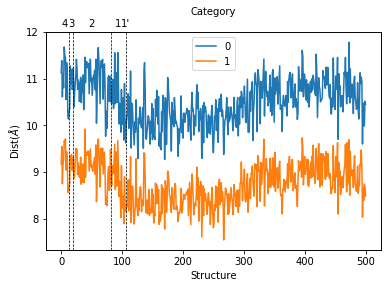

d372ph376p


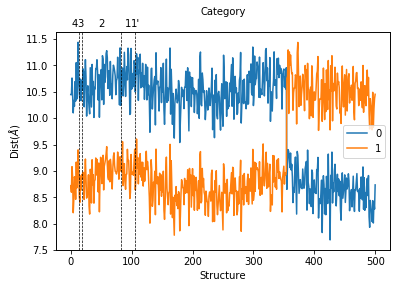

p1


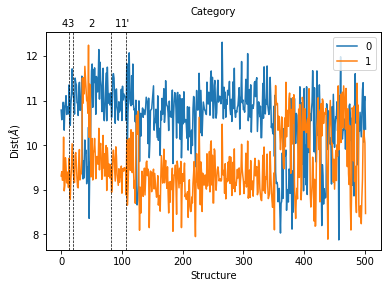

p2


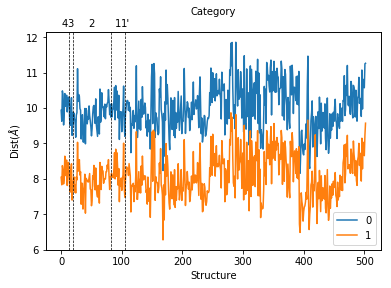

p3


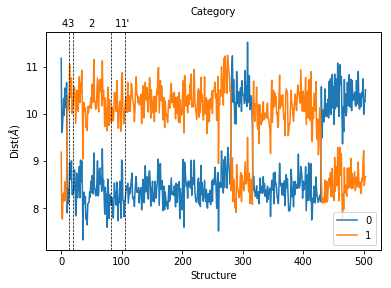

p4


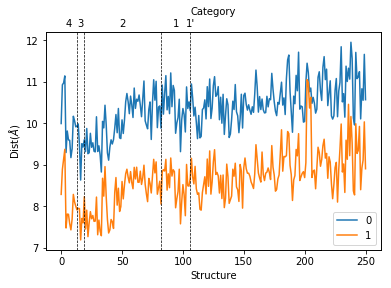

In [36]:
for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([mindist([list(zip(*dist))[22], list(zip(*dist))[37]]), # PRA O- D287 OD1
               mindist([list(zip(*dist))[23],list(zip(*dist))[38]])])  # PRA O- D287 OD2

d372p


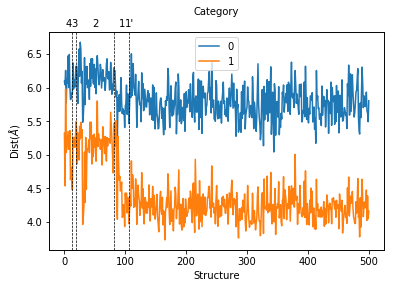

d372ph376p


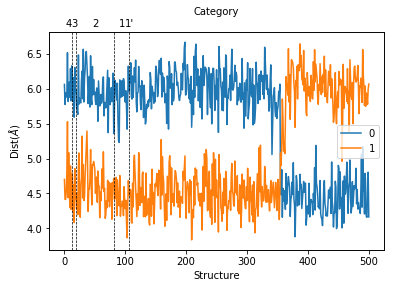

p1


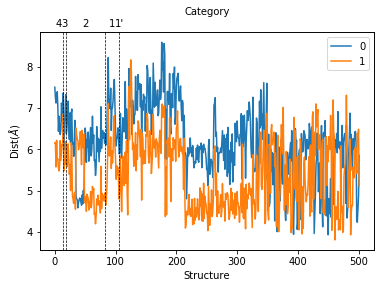

p2


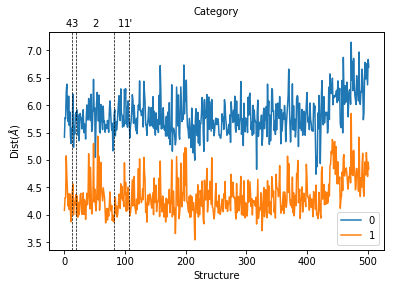

p3


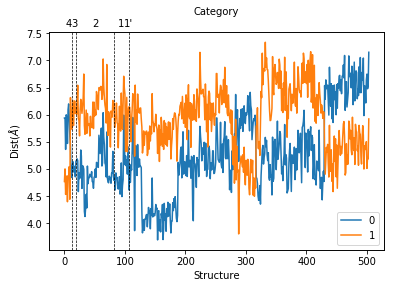

p4


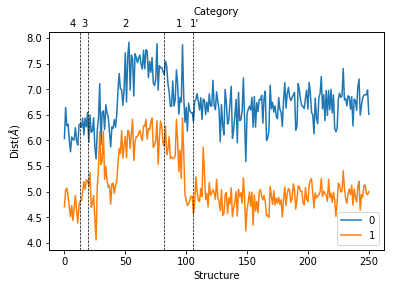

In [56]:
#Asp287 Glu126B

for traj, dist in self_dists_wholetraj.items():
    print(traj)
    plotdists([mindist([list(zip(*dist))[106], list(zip(*dist))[107]]), # D287-O1- E126B
               mindist([list(zip(*dist))[115],list(zip(*dist))[116]])]) # D287-O2- E126B